
# Project: CO2 Emission

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project we will be analysing the emission of carbon dioxide (chemical formula CO2) on a global and country level. Initiatives to reduce CO2 gas emissions meet much stiffer opposition than previous successful commitments to reduce the emission of hydrochlorofluorocarbons (HCFCs), another harmful greenhouse gas. In 2007, approximately 200 countries agreed to accelerate the elimination of HCFCs entirely by 2020 in a United Nations-sponsored Montreal summit. In contrast, the Paris Agreement under the UNs Framework Convention on Climate Change signed in 2016 consists mostly of promises and does not include firm commitments to reduce CO2 emission by emerging market countries like China or India. However, The Paris Agreement is the first universal, legally binding global climate commitment for developed countries and the EU among others started implementing ambitious CO2 reduction targets. 

> We start by looking at the historical development of CO2 emissions and national income (Gross Domestic Product) since the beginning of the industrial revolution. We use per capita (i.e. per person) data for 191 countries over the period 1800 until 2014 to analyse the correlation between CO2 emissions and national income. ***Does economic growth require increasing CO2 emissions?*** We use income projections from the data provider Gapminder to derive ***forecasts for CO2 emission trends until 2040***. Next, we look at the historical development of the national coal consumption in 61 countries and its correlation with CO2 emissions. ***Does the energy mix of a nation have a meaningful impact on its CO2 emission?*** Lastly, we look at the development of nuclear power generation in 31 countries. We analyse the impact of this CO2 neutral energy source on the emissions of countries with a meaningful per capita energy contribution of nuclear power. 

> Our country-by-country comparisons focus on members of the Group of Twenty (G20) incl. EU countries, who represent nearly 80 per cent of the world's energy demand and more than 80 per cent of global CO2 emissions. The members of the G20 are: Argentina, Australia, Brazil, Canada, China, France, Germany, India, Indonesia, Italy, Japan, Republic of Korea, Mexico, Russia, Saudi Arabia, South Africa, Turkey, United Kingdom, United States, and the European Union (Source:
 https://www.iass-potsdam.de/en/blog/2019/27/g20s-renewed-attempt-spearhead-clean-energy-transition ).  

In [116]:
# Import the necessary libraries

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

<a id='wrangling'></a>
## Upload the following time series from Gapminder into Pandas dataframes:


>**CO2 EMISSIONS (tonnes per person)** 

>Description: Carbon dioxide emissions from burning fossil fuels (metric tonnes of CO2 per person), 1800-2014, annual 

>Source: Gapminder based on Carbon Dioxide Information Analysis Center ( The U.S. Department of Energy’s (DOE) ) 




>**INCOME PER PERSON (GDP / Capita), PPP$ inflation-adjusted**

>Description: Gross domestic product per person adjusted for differences in purchasing power ( in international dollars, fixed 2011 prices, PPP based on 2011 ICP ), 1800-2040, annual

>Source: Gapminder based on World Bank, A.Maddison, M.Lindgren, IMF & others



>**COAL CONSUMPTION, per person**

>Description: Coal consumption per person (tonnes oil equivalent), 1965-2016, annual

>Source: Gapminder based on BP statistical review


>**NUCLEAR ELECTRICITY PRODUCTION, per person** 

>Description: Amount of electricity produced by nuclear power plants per person in a given year, counted in tonnes of oil equivalent (toe), 1960-2011, annual

>Source: Gapminder based on World Bank 

In [117]:
# We load our data and print out a few lines. We perform operations to inspect the data types
#   and we look for instances of missing or possibly errant data.

filename1 = 'C:\\Users\\peter\\Udacity_DAND\\A2\\co2_emissions_tonnes_per_person.csv'
co2_emissions_per_person_df = pd.read_csv(filename1, index_col='country') # use country names as row index

filename2 = 'C:\\Users\\peter\\Udacity_DAND\\A2\\income_per_person_gdppercapita_ppp_inflation_adjusted.csv'
income_per_person_df = pd.read_csv(filename2, index_col='country') # index_col=str)

filename3 = 'C:\\Users\\peter\\Udacity_DAND\\A2\\coal_consumption_per_cap.csv'
coal_per_person_df = pd.read_csv(filename3, index_col='country') # index_col=str)

filename4 = 'C:\\Users\\peter\\Udacity_DAND\\A2\\nuclear_power_generation_per_person.csv'
nuclear_per_person_df = pd.read_csv(filename4, index_col='country') # index_col=str)

# List of 19 G20 member states (without EU as an entity)
G20_countries =['Argentina', 'Australia','Brazil','Canada','China','France','Germany','India','Indonesia','Italy','Japan'
                ,'South Korea','Mexico','Russia','Saudi Arabia','South Africa','Turkey','United Kingdom'
                ,'United States']

#co2_emissions_per_person_df.head()
income_per_person_df.head()
#nuclear_per_person_df.head()
#coal_per_person_df.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,603,603,603,603,603,603,603,603,603,603,...,2420,2470,2520,2580,2640,2700,2760,2820,2880,2940
Albania,667,667,667,667,667,668,668,668,668,668,...,18500,18900,19300,19700,20200,20600,21100,21500,22000,22500
Algeria,715,716,717,718,719,720,721,722,723,724,...,15600,15900,16300,16700,17000,17400,17800,18200,18600,19000
Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,1220,...,73200,74800,76400,78100,79900,81600,83400,85300,87200,89100
Angola,618,620,623,626,628,631,634,637,640,642,...,6270,6410,6550,6700,6850,7000,7150,7310,7470,7640


The income statistic contains numerical data for 193 countries (rows) over 241 years (columns) 

In [118]:
income_per_person_df.shape 

(193, 241)

The income data does not contain non-numeric NaN values (i.e. not a number). The data is dense.

In [119]:
income_per_person_df.isna().sum().sum() # total sum of NaNs in the dataframe

0

Let us visualize the development of the mean of the average income per capita in all 193 countries over time. This number is not the same as an average income per capita for every global citizen, but it helps to visualize the general trend in the 193 national income time series.  

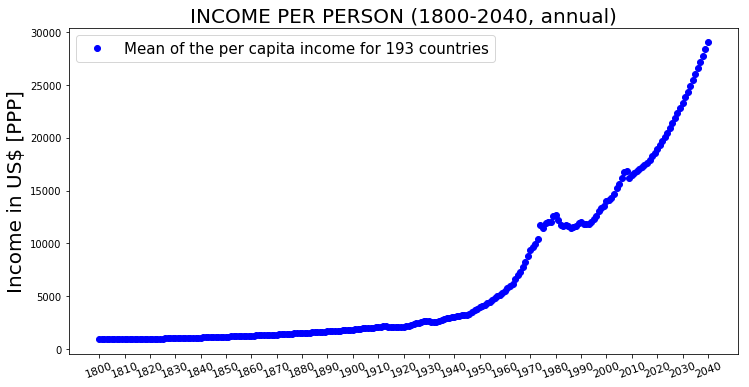

Shape of the data :  (193, 241) (#of countries , #of years)
        No of NaNs:  0
NANs by year:
 2036    0
2037    0
2038    0
2039    0
2040    0
dtype: int64


In [120]:
# Development of the mean of the average income per capita dataframe    
plt.figure(figsize=(12,6))
plt.title('INCOME PER PERSON (1800-2040, annual)', fontsize=20)
plt.plot(income_per_person_df.mean(axis=0),'bo', label = 'Mean of the per capita income for 193 countries')
plt.legend(loc='best',fontsize=15)
plt.ylabel("Income in US$ [PPP]", fontsize=20)
plt.xticks(np.arange(1800,2041,10), np.arange(1800,2041,10), rotation=20, fontsize='11') #change frequency of x-axis ticks
plt.show();

print('Shape of the data : ', income_per_person_df.shape, '(#of countries , #of years)')
print('        No of NaNs: ', income_per_person_df.isna().sum().sum())
print('NANs by year:\n',income_per_person_df.isna().sum().tail())

The 193 national income time series consist of both ***historical data and forecasts until 2040***. It is not clearly indicated when the forecast starts. The chart for the mean of the time series follows an upwards trend with some bumps around the two world wars and major economic crisis (e.g. global recession in the early 1930s, oil crisis in the 1970s and 1980s, world financial crisis 2008-09). The chart is smooth and almost continuous. 

The year 1974 shows an ***outlier*** (i.e. data point that differs significantly from other observations). The 1970s energy crisis occurred when the Western world, particularly the United States, Canada, Western Europe, Australia, and New Zealand, faced substantial petroleum shortages, real and perceived, as well as elevated prices. (Source: Wikipedia)

In [121]:
for year in range(1970,1983):   # Print the mean income during the Energy Crisis in the 1970s and early 1980s.
    print(str(year), '$',round(income_per_person_df.mean(axis=0)[str(year)],2))

1970 $ 9380.9
1971 $ 9684.67
1972 $ 9956.91
1973 $ 10446.08
1974 $ 11708.59
1975 $ 11494.67
1976 $ 11903.73
1977 $ 12004.94
1978 $ 12032.38
1979 $ 12613.8
1980 $ 12650.27
1981 $ 12212.91
1982 $ 11792.28


The two worst crises of this period were the 1973 oil crisis and the 1979 energy crisis, when the Yom Kippur War and the Iranian Revolution triggered interruptions in Middle Eastern oil exports (Source: Wikipedia). The sharp rise in oil prices led to a massive transfer of income from the Western world to OPEC countries (Organization of the Petroleum Exporting Countries). This might explain the outlier for 1974 in the mean income time series. 

Let us take a look at the development of national income per capita data for some OECD countries during the oil crisis.

In [122]:
countrylist=['Gabon' ,'Kuwait' ,'United Arab Emirates','Syria','Saudi Arabia', 'Palau'] # example of OPEC countries
                                                                                        # and Micronesian Palau
for year in range(1970,1980):
    print(str(year), end =" ")
    
    for country in countrylist:
        print(country,'$',income_per_person_df.loc[country][str(year)], end ="   ")
    print() 


1970 Gabon $ 4680   Kuwait $ 53400   United Arab Emirates $ 41800   Syria $ 2580   Saudi Arabia $ 45500   Palau $ 28000   
1971 Gabon $ 5830   Kuwait $ 62900   United Arab Emirates $ 40500   Syria $ 2740   Saudi Arabia $ 53600   Palau $ 27100   
1972 Gabon $ 6220   Kuwait $ 61700   United Arab Emirates $ 38800   Syria $ 3320   Saudi Arabia $ 60500   Palau $ 29800   
1973 Gabon $ 8400   Kuwait $ 58700   United Arab Emirates $ 59400   Syria $ 2930   Saudi Arabia $ 65100   Palau $ 35700   
1974 Gabon $ 18400   Kuwait $ 114000   United Arab Emirates $ 145000   Syria $ 3520   Saudi Arabia $ 103000   Palau $ 51200   
1975 Gabon $ 18300   Kuwait $ 90700   United Arab Emirates $ 163000   Syria $ 4070   Saudi Arabia $ 78400   Palau $ 53500   
1976 Gabon $ 21900   Kuwait $ 91300   United Arab Emirates $ 161000   Syria $ 4370   Saudi Arabia $ 92600   Palau $ 39100   
1977 Gabon $ 20800   Kuwait $ 86900   United Arab Emirates $ 163000   Syria $ 4180   Saudi Arabia $ 89600   Palau $ 37300   
1978 G

During the 1973 oil crisis, some of the time series for OPEC countries show a strong increase in per capita income. This jump can explain the 1974 outlier in the aggregate time series. Nevertheless, the 1974-5 spike in the national income of Palau, a Micronesian archipelago with some 17,000 inhabitants is mysterious and might be an error. Palau was made a part of the United States-governed Trust Territory of the Pacific Islands in 1947 and the islands gained full sovereignty in 1994 under a Compact of Free Association with the United States (Source: Wikipedia).  In general, the income data is clean and dense with some reservations for small nations’ data. 

Next, we look at the coal consumption.

The mean of the ***COAL CONSUMPTION per capita*** data shows a gradual decline from approx. 0.6 ***tonnes of oil equivalent (TOE)*** in 1965 to approx. 0.5 TOE in 2016. The tonne of oil equivalent is a unit of energy defined as the amount of energy released by burning one tonne of crude oil. It is approximately 42 gigajoules or 11,630 kilowatt-hours. Other energy carriers can be converted into tonnes of oil equivalent (toe) using the following conversion factors: 1 t diesel = 1,01 toe, 1 t petrol = 1,05 toe (Source: https://ec.europa.eu/eurostat/statistics-explained/index.php/Glossary:Tonnes_of_oil_equivalent_%28toe%29 )


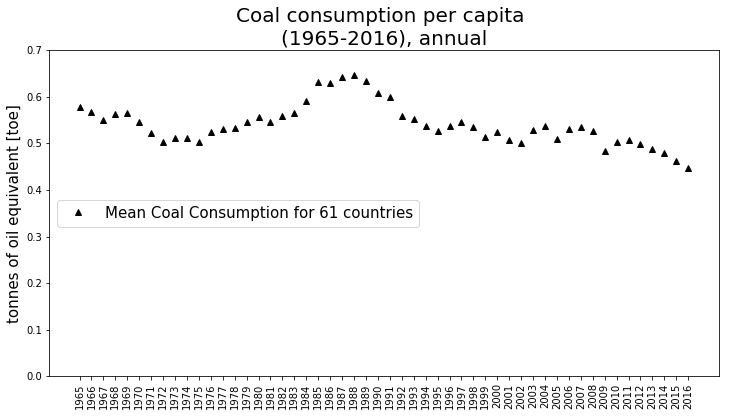

Shape of the data:  (61, 52) (#of countries, #of years)
       No of NANs:  285


2012    1
2013    1
2014    1
2015    1
2016    1
dtype: int64

In [123]:
# Development of the mean of the average coal consumption per capita dataframe    
plt.figure(figsize=(12,6))
plt.title('Coal consumption per capita \n(1965-2016), annual',fontsize=20)

plt.plot(coal_per_person_df.mean(axis=0),'k^', label = 'Mean Coal Consumption for 61 countries')
plt.legend(loc= 'center left',fontsize=15)
plt.ylabel("tonnes of oil equivalent [toe]",fontsize=15)
plt.ylim(0,0.7)
plt.xticks(rotation='vertical')
plt.show();

print('Shape of the data: ', coal_per_person_df.shape, '(#of countries, #of years)')
print('       No of NANs: ', coal_per_person_df.isna().sum().sum())
coal_per_person_df.isna().sum().tail()

The NAN values in recent years are reported for Turkmenistan. According to BP Plc. statistics, Turkmenistan’s coal consumption averaged 0.000 TOE mn from 1985 to 2018, with 34 observations. The data reached an all-time high of 0.368 TOE mn in 1990 and a record low of 0.000 TOE mn in 2018. Source: https://www.ceicdata.com/en/indicator/turkmenistan/coal-consumption ). Most of the remaining NAN values occur before 1985 when both the ***Union of Soviet Socialist Republics (USSR)*** and its multiple national Soviet republics member states do not show data. Even though the USSR lasted until 1991, eight of her former 15 member republics start showing national data in 1985. 


In [124]:
# List of the former national Soviet republics in the COAL CONSUMPTION data who became independent in 1990.
countrylist=['Azerbaijan' ,'Belarus', 'Kazakhstan', 'Lithuania', 'Russia','Turkmenistan','Ukraine','Uzbekistan']

for year in range(1983,1990):
    print(str(year), end =" ")
    
    for country in countrylist:
        print(country,str(round(coal_per_person_df.loc[country][str(year)],1)), end ="   ")
    print() 

1983 Azerbaijan nan   Belarus nan   Kazakhstan nan   Lithuania nan   Russia nan   Turkmenistan nan   Ukraine nan   Uzbekistan nan   
1984 Azerbaijan nan   Belarus nan   Kazakhstan nan   Lithuania nan   Russia nan   Turkmenistan nan   Ukraine nan   Uzbekistan nan   
1985 Azerbaijan 0.0   Belarus 0.2   Kazakhstan 2.4   Lithuania 0.2   Russia 1.4   Turkmenistan 0.1   Ukraine 1.5   Uzbekistan 0.2   
1986 Azerbaijan 0.0   Belarus 0.2   Kazakhstan 2.5   Lithuania 0.3   Russia 1.4   Turkmenistan 0.1   Ukraine 1.5   Uzbekistan 0.2   
1987 Azerbaijan 0.0   Belarus 0.2   Kazakhstan 2.6   Lithuania 0.3   Russia 1.4   Turkmenistan 0.1   Ukraine 1.5   Uzbekistan 0.2   
1988 Azerbaijan 0.0   Belarus 0.2   Kazakhstan 2.7   Lithuania 0.3   Russia 1.4   Turkmenistan 0.1   Ukraine 1.4   Uzbekistan 0.1   
1989 Azerbaijan 0.0   Belarus 0.2   Kazakhstan 2.5   Lithuania 0.2   Russia 1.3   Turkmenistan 0.1   Ukraine 1.3   Uzbekistan 0.2   


Some of the former USSR republics show high coal consumption rates since 1985. In particular, we can assume that Kazakhstan, Russia and Ukraine had high coal consumption rates in the previous 20 years as well. Therefore, replacing all NaN values with zeros would underestimate the aggregate coal consumption in the period 1965-1984. 

Let us ***interpolate the missing data values*** at the beginning without changing the more recent NaN values. 


In [125]:
coal_per_person_df.interpolate(method='linear', axis=1, inplace=True, limit_direction='backward')

print('Shape of the data: ', coal_per_person_df.shape, '(#of countries, #of years)')
print('       No of NANs: ', coal_per_person_df.isna().sum().sum())
coal_per_person_df.isna().sum().tail()

Shape of the data:  (61, 52) (#of countries, #of years)
       No of NANs:  20


2012    1
2013    1
2014    1
2015    1
2016    1
dtype: int64

Now let us replace the remaining 20 NANs with zeros. This will correctly change Turkmenistan's data for 1997 - 2016 to Zero. 

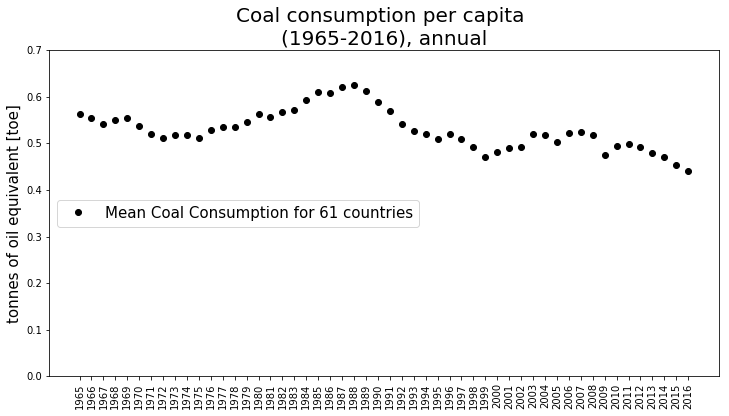

Shape of the data:  (61, 52) (#of countries, #of years)
       No of NANs:  0


2012    0
2013    0
2014    0
2015    0
2016    0
dtype: int64

In [126]:
coal_per_person_df.fillna(0,inplace=True) # Replacing NaN values with zeros

# Development of the mean of the average coal consumption per capita dataframe    
plt.figure(figsize=(12,6))
plt.title('Coal consumption per capita \n(1965-2016), annual',fontsize=20)

plt.plot(coal_per_person_df.mean(axis=0),'ko', label = 'Mean Coal Consumption for 61 countries')
plt.legend(loc= 'center left',fontsize=15)
plt.ylabel("tonnes of oil equivalent [toe]",fontsize=15)
plt.ylim(0,0.7)
plt.xticks(rotation='vertical')
plt.show();

print('Shape of the data: ', coal_per_person_df.shape, '(#of countries, #of years)')
print('       No of NANs: ', coal_per_person_df.isna().sum().sum())
coal_per_person_df.isna().sum().tail()

Let us now turn to the ***NUCLEAR ELECTRICITY PRODUCTION*** time series. NUCLEAR ELECTRICITY PRODUCTION, per person shows the amount of electricity produced by nuclear power plants per person in a given year, counted in tonnes of oil equivalent. On June 27, 1954, the world's first nuclear power station to generate electricity for a power grid, the Obninsk Nuclear Power Plant, started operations in Obninsk of the Soviet Union. The world's first full scale power station, Calder Hall in England, opened on October 17, 1956 (Source: Wikipeadia).  

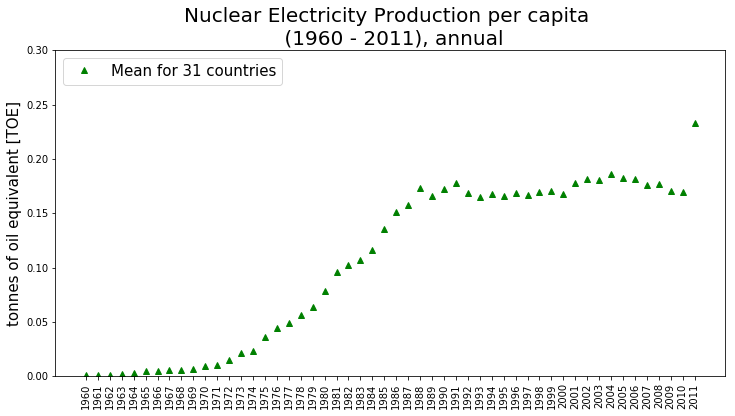

Shape of the data :  (31, 52) (#of countries , #of years)
        No of NaNs:  528
NANs by year:
 2007     1
2008     1
2009     1
2010     2
2011    13
dtype: int64


In [127]:
# Development of the mean of the average coal consumption per capita dataframe    
plt.figure(figsize=(12,6))
plt.title('Nuclear Electricity Production per capita \n (1960 - 2011), annual',fontsize=20)
plt.plot(nuclear_per_person_df.mean(axis=0),'g^', label = 'Mean for 31 countries')
plt.legend(loc= 'upper left', fontsize=15)
plt.ylabel("tonnes of oil equivalent [TOE]",fontsize=15)
plt.ylim(0,0.3)
plt.xticks(rotation='vertical')
plt.show();

print('Shape of the data : ', nuclear_per_person_df.shape, '(#of countries , #of years)')
print('        No of NaNs: ', nuclear_per_person_df.isna().sum().sum())
print('NANs by year:\n',nuclear_per_person_df.isna().sum().tail())

Nuclear electricity generation in the USSR is not included in the NUCLEAR ELECTRICITY PRODUCTION data. While in 1960 only France, the UK and the USA show data for nuclear power generation, the number of NaNs diminishes over time when new countries began with the peaceful use of nuclear energy. Nevertheless, the most recent years include NaANs as well and the last year 2011 includes a high number of NANs. 

Replacing missing data in recent years with zeros would assume that those countries terminated or interrupted their nuclear power generation. The ***Fukushima Daiichi nuclear disaster*** started 11 March 2011 and it was the most severe nuclear accident since the 26 April 1986 ***Chernobyl disaster*** in the Ukraine (former USSR) and the only other disaster to be given the Level 7 event classification of the International Nuclear Event Scale (source: Wikipedia). By March 2012, one year after the disaster, all but two of Japan's nuclear reactors had been shut down. 

The Japanese data for 2011 reflects this significant reduction in nuclear power generation, but it does not show a NaN value.

In [128]:
print('2010', nuclear_per_person_df['2010']['Japan'])
print('2011', nuclear_per_person_df['2011']['Japan'])

2010 0.196
2011 0.0692


However, after the Fukushima Daiichi accident nuclear power plans were not abandoned in other countries. Therefore, the high number of NaN values in 2011 are not due to events in Japan and should not be replaced with zeros.  

Let us ***investigate reasons for NaN values*** before 2011. Firstly, Lithuania agreed to close the Ignalina Nuclear Power Plant as part of its accession agreement to the European Union. Unit 1 was closed in December 2004; Unit 2, which counted for 25% of Lithuania's electricity generating capacity and supplied about 70% of Lithuania's electrical demand, was closed on December 31, 2009 (Source: Wikipedia). 

In [129]:
for year in range(2003,2012):
    print(str(year), nuclear_per_person_df[str(year)]['Lithuania'])

2003 0.386
2004 0.37799999999999995
2005 0.26
2006 0.21899999999999997
2007 0.25
2008 0.253
2009 0.27899999999999997
2010 nan
2011 nan


Secondly, Italy started producing nuclear energy in the early 1960s, but all plants were closed by 1990 following the Italian nuclear power referendum. As of 2018, Italy is one of only two countries, along with Lithuania, that completely phased out nuclear power for electricity generation after having operational reactors (Source: Wikipedia).

In [130]:
for year in range(1987,1990):
    print(str(year), nuclear_per_person_df[str(year)]['Italy'])

1987 0.00026000000000000003
1988 nan
1989 nan


Missing data values for 2011 for every other country but Lithuania and Italy can be extrapolated from the data in previous years. Using the INTERPOLATE methode will replace most NaNs in 2011, but it will also 'wrongly' interpolate values for Lithuania and Italy. Therefore, we manually replace those values with zeros.

In [131]:
nuclear_per_person_df.interpolate(method='linear', axis=1, limit=1, inplace=True, limit_direction='forward')
nuclear_per_person_df.loc['Lithuania']['2010']=0
nuclear_per_person_df.loc['Italy']['1988']=0

In [132]:
for year in range(1987,1990):
    print(str(year), nuclear_per_person_df[str(year)]['Italy'])

1987 0.00026000000000000003
1988 0.0
1989 nan


In [133]:
print(nuclear_per_person_df.isna().sum().head())
print(nuclear_per_person_df.isna().sum().tail())

1960    28
1961    27
1962    26
1963    24
1964    24
dtype: int64
2007    1
2008    1
2009    1
2010    1
2011    2
dtype: int64


Now we replace the remaining NaN values by zeros. Let us take a look at the clean data.

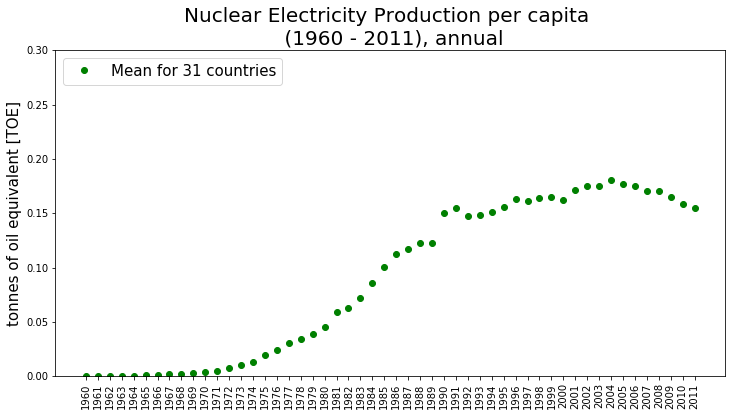

Shape of the data :  (31, 52) (#of countries , # of years)
        No of NANs:  0


In [134]:
nuclear_per_person_df = nuclear_per_person_df.fillna(0) # Relpacing NAN values with Zeros
plt.figure(figsize=(12,6))
plt.title('Nuclear Electricity Production per capita \n (1960 - 2011), annual',fontsize=20)
plt.plot(nuclear_per_person_df.mean(axis=0),'go', label = 'Mean for 31 countries')
plt.legend(loc= 'upper left', fontsize=15)
plt.ylabel("tonnes of oil equivalent [TOE]",fontsize=15)
plt.ylim(0,0.3)
plt.xticks(rotation=90)
plt.show();

print('Shape of the data : ', nuclear_per_person_df.shape, '(#of countries , # of years)')
print('        No of NANs: ', nuclear_per_person_df.isna().sum().sum())

The jump from 1989 to 1990 is due to several new countries split away from the former USSR (i.e. Lithuania, Ukraine) and Yugoslavia independently joining the statistic (Slovenia, Russia). In contrast, the two successors of former CSSR, Czech Republic and Slovak Republic, show independent data starting 1983 and 1972, respectively.

The fact that data from the former USSR is not included in this statistic limits its use prior to 1990. Nevertheless, from 1990 onwards most countries who would eventually join the 'nuclear club' had joined (incl. China in 1993 and India in 1971).   

Next we would like to inspect the ***CO2 EMISSIONS per capita*** time series. The data shows carbon dioxide emissions from burning fossil fuels (metric tonnes of CO2 per person).

In [135]:
co2_emissions_per_person_df.shape # CO2 dataframe contains data for 192 countries (rows) over 215 years (columns)

(192, 215)

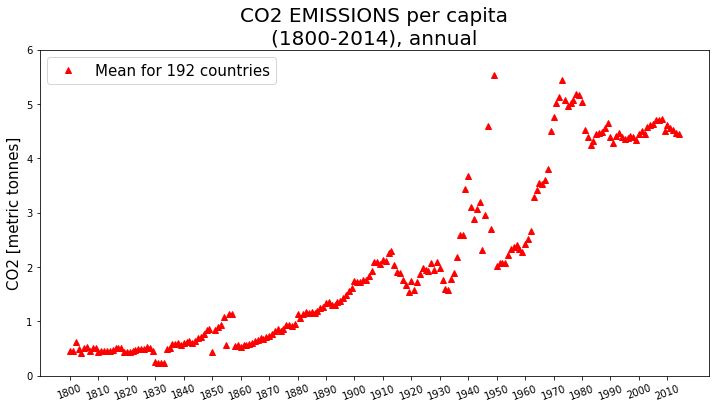

Shape of the data :  (192, 215) (# of countries , # of years)
        No of NaNs:  24436


In [136]:
# Development of the mean of the average income per capita dataframe    
plt.figure(figsize=(12,6))
plt.title('CO2 EMISSIONS per capita\n(1800-2014), annual', fontsize=20)
plt.plot(co2_emissions_per_person_df.mean(axis=0),'r^',label = 'Mean for 192 countries')  
plt.legend(loc= 'upper left',fontsize=15)
plt.ylabel('CO2 [metric tonnes]', fontsize=15)
plt.ylim(0,6)
plt.xticks(np.arange(1800,2014,10), np.arange(1800,2014,10), rotation=20, fontsize='10')
plt.show()

print('Shape of the data : ', co2_emissions_per_person_df.shape, '(# of countries , # of years)')
print('        No of NaNs: ', co2_emissions_per_person_df.isna().sum().sum())

The data for most countries contains NaN values for the 19th and early 20th centuries. Nevertheless, for the years 2009 until 2014 data is available for all countries except for recently founded South Sudan. She gained independence from the Republic of the Sudan in 2011, making her the most recent sovereign state with widespread recognition (Wikipedia).

In [137]:
co2_emissions_per_person_df.loc['South Sudan'][210:] 

2010      NaN
2011      NaN
2012    0.123
2013    0.130
2014    0.130
Name: South Sudan, dtype: float64

### Data Cleaning of CO2 emission data and income data 

The INCOME data is clean and dense, but it contains extrapolated data until 2040. Let us delete all columns after 2014 to make sure we only use historical data and to be consistent with the CO2 data (i.e. 1800-2014). Nevertheless, we keep a copy of the entire statistic with projections for later use. 

In [138]:
income_long = income_per_person_df.copy(deep=True) # keep a copy of the original INCOME data. 
    
for i in range (2015,2041):
    income_per_person_df.drop([str(i)], axis=1, inplace=True) # drop all columns after 2014 permanently.  

In contrast, the CO2 data contains many NaNs. Dropping the CO2 data for countries without a full 215-year data history leaves only the five countries Canada, Germany, Poland, UK and USA.  

In [139]:
# Define a new CO2 dataframe that drops all rows (i.e. countries) with NaNs in any column (i.e. year) of the original CO2 df.

co2_emissions_per_person_nonzero_df = co2_emissions_per_person_df.dropna(axis=0, how='any')
co2_emissions_per_person_nonzero_df

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
country,,,,,,,,,,,,,,,,,,,,,
Canada,0.00568,0.00561,0.00555,0.00548,0.00542,0.00536,0.00529,0.00523,0.00517,0.00511,...,17.30,16.70,16.8,16.80,15.90,15.60,15.60,14.80,14.70,15.10
Germany,0.03480,0.02330,0.02400,0.02310,0.04330,0.04450,0.04000,0.11400,0.03790,0.03920,...,9.76,10.00,9.6,9.62,8.92,9.38,9.05,9.13,9.32,8.83
Poland,0.04280,0.04640,0.04700,0.04790,0.04730,0.05880,0.05330,0.03850,0.05090,0.04770,...,7.89,8.32,8.2,8.22,7.77,8.25,8.27,7.83,7.89,7.46
United Kingdom,2.16000,2.14000,2.13000,2.36000,2.34000,2.40000,2.50000,2.47000,2.44000,2.41000,...,9.00,8.91,8.6,8.39,7.52,7.79,7.02,7.29,7.09,6.46
United States,0.03720,0.03860,0.04100,0.04120,0.04540,0.04560,0.04370,0.04860,0.04950,0.04990,...,19.60,19.10,19.3,18.50,17.20,17.50,17.00,16.30,16.40,16.50


Let us visualize the dense CO2 data for Canada, Germany, Poland, UK and USA. 

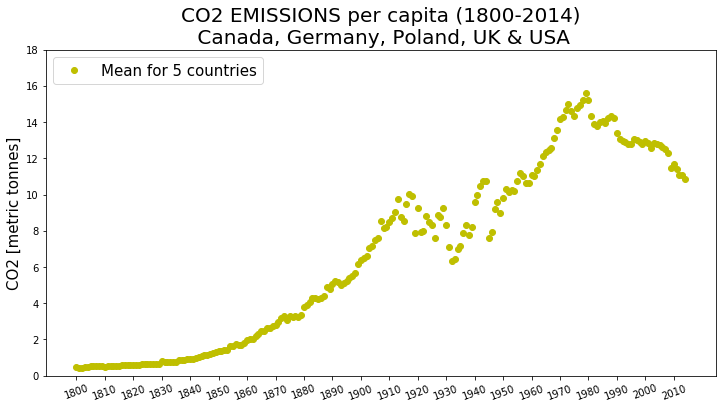

Shape of the data :  (5, 215) (#of countries, #of years)
  Total # of NANs :  0


In [140]:
plt.figure(figsize=(12,6))
plt.plot(co2_emissions_per_person_nonzero_df.mean(axis=0),'yo',label = 'Mean for 5 countries')  
plt.title('CO2 EMISSIONS per capita (1800-2014)\n Canada, Germany, Poland, UK & USA', fontsize=20)
plt.legend(loc= 'upper left',fontsize=15)
plt.ylabel("CO2 [metric tonnes]",fontsize=15)
plt.xticks(np.arange(1800,2014,10), np.arange(1800,2014,10), rotation=20, fontsize='10')
plt.ylim(0,18)

plt.show();
print('Shape of the data : ', co2_emissions_per_person_nonzero_df.shape, '(#of countries, #of years)')
print('  Total # of NANs : ', co2_emissions_per_person_nonzero_df.isna().sum().sum())

The CO2 data for those five countries is very dense and clean. However, limiting our analysis to these countries would ignore trends outside Europe and North America. Fortunately, we can use the CO2 data from all G20 countries incl. all EU member states. 
The Industrial Revolution started in the UK followed by countries in continental Europe and North America with sizeable coal deposits. Therefore, the original data set with zeros replacing NaN values represents the majority of global CO2 emission for the entire 215 years’ time horizon. 
 

In [141]:
print(co2_emissions_per_person_df.loc['India'][75:82]) # India
co2_emissions_per_person_df.loc['China'][100:105] # China

1875        NaN
1876        NaN
1877        NaN
1878    0.00884
1879    0.00836
1880    0.00931
1881    0.00904
Name: India, dtype: float64


1900        NaN
1901        NaN
1902    0.00024
1903    0.00483
1904    0.00510
Name: China, dtype: float64

Replacing the NaN values with zeros for the remaining 187 countries assumes that their contribution to global CO2 emission was negligible prior to the release of national CO2 data. This approach is justified because national statistics typically start in years with low CO2 per capita numbers and increase thereafter. For example, India's time series starts in 1878 and China's in the early 1900s with very low per capita CO2 readings. In 2014, those two countries reach CO2 emissions of 1.72 tonnes per capita for India and 7.4 tonnes per capita for China, which now accounts for sizable contributions to the total global CO2 emission. 

In [142]:
co2_emissions_per_person_df.fillna(0, axis=1, inplace=True) # Relpacing NAN values with Zeros

Now let us visualize the CO2 data without NaNs.

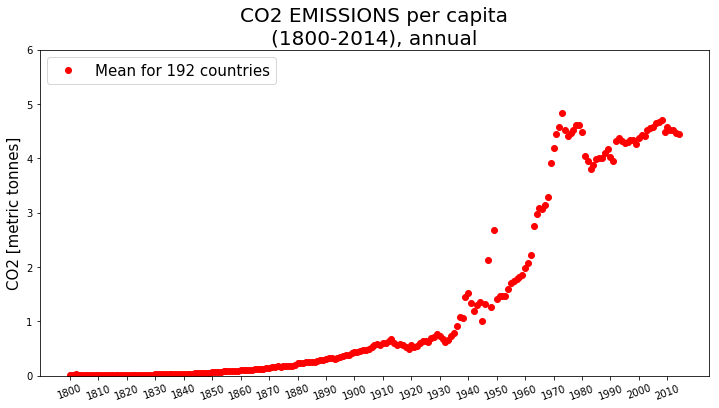

Shape of the data :  (192, 215) (#of countries, #of years)
  Total # of NANs :  0


In [143]:
plt.figure(figsize=(12,6))
plt.plot(co2_emissions_per_person_df.mean(axis=0),'ro',label = 'Mean for 192 countries')  
plt.title('CO2 EMISSIONS per capita\n(1800-2014), annual', fontsize=20)
plt.legend(loc= 'upper left', fontsize=15)
plt.ylabel('CO2 [metric tonnes]',fontsize=15)
plt.xticks(np.arange(1800,2014,10), np.arange(1800,2014,10), rotation=20, fontsize='10')
plt.ylim(0,6);
plt.show()
print('Shape of the data : ', co2_emissions_per_person_df.shape, '(#of countries, #of years)')
print('  Total # of NANs : ', co2_emissions_per_person_df.isna().sum().sum())

The CO2 data still shows some outliers, especially during World War 2, at the end of the 1940s and in the 1970s. Let us look at some of the most volatile national time series.  

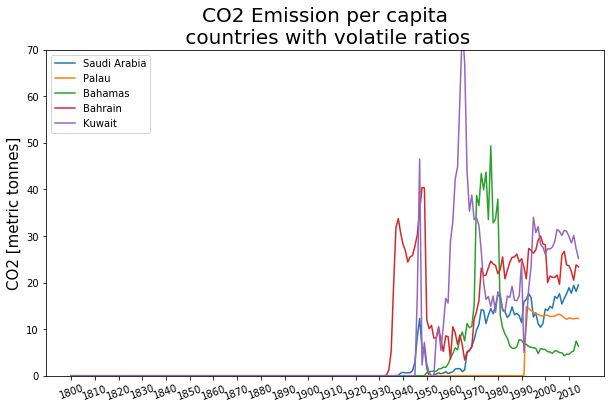

In [144]:
plt.figure(figsize=(10,6))
plt.title('CO2 Emission per capita\n countries with volatile ratios', fontsize=20)
plt.plot(co2_emissions_per_person_df.loc['Saudi Arabia'],label = 'Saudi Arabia')
plt.plot(co2_emissions_per_person_df.loc['Palau'],label = 'Palau')
plt.plot(co2_emissions_per_person_df.loc['Bahamas'],label = 'Bahamas') 
plt.plot(co2_emissions_per_person_df.loc['Bahrain'],label = 'Bahrain')
plt.plot(co2_emissions_per_person_df.loc['Kuwait'],label = 'Kuwait')

plt.xticks(np.arange(1800,2014,10), np.arange(1800,2014,10), rotation=20, fontsize='10')
plt.legend(loc= 'upper left')
plt.ylabel('CO2 [metric tonnes]', fontsize=15)
plt.ylim(0,70)
plt.show()


Some small countries show a high volatility of the CO2 per capita ratio. For example, Kuwait's CO2 emission per capita ratio briefly spiked in 1960 up to a very high level and the small Micronesian nation Palau only join the statistic in 1990 after gaining independence. Therefore, in some years spikes in the mean value for 192 countries result from small countries' volatility. Nevertheless, outliers in the mean are short lived, and they do not change the general trend of the mean time series. For country-on-country comparisons we will focus on the larger G20 member states incl. EU members.      

In [145]:
print('# of countries in income data: ', len(income_per_person_df.index.values))
print('# of countries in co2 data   : ',len(co2_emissions_per_person_df))

# of countries in income data:  193
# of countries in co2 data   :  192


The INCOME data frame consists of time series for 193 countries and the CO2 data frame includes time series for 192 countries. Later we want to compare the aggregate of both data frames. Hence, we need to harmonize both data frames and make sure that they only contain the same list of countries.

In [146]:
co2_indexNamesArr = co2_emissions_per_person_df.index.values
income_indexNamesArr = income_per_person_df.index.values

for i in range(len(income_indexNamesArr)):
    if income_indexNamesArr[i] in co2_indexNamesArr:
        continue
    else:
        print('Country included in income data but not in CO2 data: ', income_indexNamesArr[i])
    
for n in range(len(co2_indexNamesArr)):
    if co2_indexNamesArr[n] in income_indexNamesArr:
        continue
    else:
        print('Country included in CO2 data but not in income data: ', co2_indexNamesArr[n])    

Country included in income data but not in CO2 data:  Monaco
Country included in income data but not in CO2 data:  San Marino
Country included in CO2 data but not in income data:  Liechtenstein


Let us drop Monaco and San Marino from the INCOME data and Liechtenstein from the CO2 data to have the ***same list of 191 countries in both statistics***.

In [147]:
income_per_person_df.drop('Monaco', axis=0, inplace=True)
income_per_person_df.drop('San Marino', axis=0, inplace=True)
co2_emissions_per_person_df.drop('Liechtenstein', axis=0, inplace=True)

print(income_per_person_df.shape)
print(co2_emissions_per_person_df.shape)

(191, 215)
(191, 215)


Now all of the four data frames are in good shape and we can start the data exploration.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Description of trends in CO2 emissions and national income)

>What are the historical trends for national income and CO2 emissions in advanced countries and in emerging economies? 

>Both statistics are available for long term comparison from 1800 until 2014. We will be looking at the aggregate level and at the country level. 

Let us start with the summary statistics table for the INCOME data.  

In [148]:
income_per_person_df.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,...,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,940.115183,940.450262,943.324607,943.172775,944.842932,945.329843,946.497382,946.115183,943.068063,944.267016,...,15234.973822,15820.261780,16337.450262,16455.151832,15817.214660,16100.089005,16348.738220,16523.418848,16680.136126,16879.931937
std,504.642424,502.881064,513.077145,507.828024,515.114046,509.695122,510.903430,504.153284,486.035011,488.304421,...,18925.290824,19498.190696,19677.531621,19334.036021,18258.261067,18555.293632,18862.234004,18721.044415,18661.040692,18705.984820
min,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,...,549.000000,559.000000,575.000000,591.000000,588.000000,609.000000,614.000000,616.000000,598.000000,602.000000
25%,605.500000,605.500000,605.500000,606.000000,606.000000,606.000000,606.500000,606.500000,606.500000,607.000000,...,2660.000000,2715.000000,2835.000000,3025.000000,3090.000000,3170.000000,3365.000000,3320.000000,3260.000000,3225.000000
50%,846.000000,846.000000,847.000000,847.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,...,8000.000000,8610.000000,8840.000000,9300.000000,9520.000000,9860.000000,9930.000000,10000.000000,10500.000000,10700.000000
75%,1095.000000,1095.000000,1100.000000,1110.000000,1110.000000,1115.000000,1115.000000,1120.000000,1120.000000,1125.000000,...,19400.000000,20750.000000,22350.000000,23350.000000,20900.000000,21250.000000,22200.000000,22750.000000,23000.000000,23800.000000
max,4230.000000,4160.000000,4390.000000,4300.000000,4500.000000,4240.000000,4270.000000,3910.000000,3480.000000,3430.000000,...,110000.000000,119000.000000,119000.000000,120000.000000,117000.000000,125000.000000,129000.000000,125000.000000,123000.000000,121000.000000


For 2014, the mean annual income is USD 16,880 with a standard deviation of USD 18,706. This indicates a ***non-normal distribution*** because a Gaussian distribution is symmetric around the mean and 67% of the normal distribution falls between +/- one standard derivation. The minimum income is USD 602,- and the upper 25% quartiles, 50% quartile (Median) and 75% lower quartiles are USD 3,225 ,USD 10,700 , and USD 23,800 ,respectively. The highest income of any country is USD 121,000 . 

In contrast, the spread of national incomes at the start of the industrial revolution was lower. In 1800, the mean income for the 191 countries was USD 940 with a standard derivation of USD 505 and 75%/25% quartiles at USD 1095 and USD 606, respectively. However, there were outlierers and the maximum income stood at USD 4,230 (Netherlands).   

In [149]:
income_per_person_df['1800'].idxmax() # If you want the index of the maximum, use idxmax.                  
                                      # This is the equivalent of the numpy.ndarray method argmax.

'Netherlands'

Let us take a look at the income distribution in 2014.

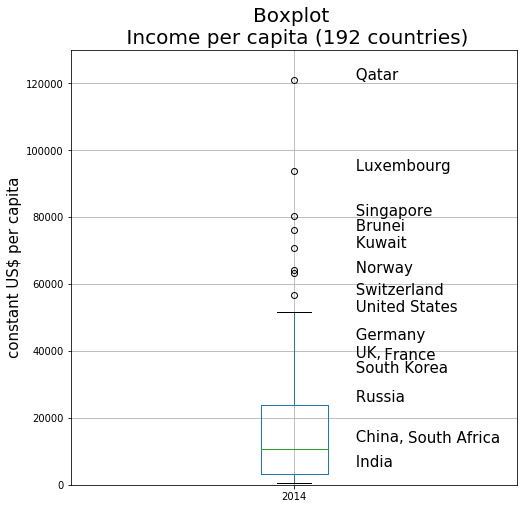

In [150]:
plt.figure(figsize=(8,8)) 
income_per_person_df.boxplot(column='2014')
plt.title('Boxplot \n Income per capita (192 countries)',fontsize=20)
plt.ylabel('constant US$ per capita',fontsize=15)
plt.annotate('             Qatar', (1, income_per_person_df.loc['Qatar'][214]), fontsize=15)
plt.annotate('             Luxembourg', (1, income_per_person_df.loc['Luxembourg'][214]), fontsize=15)
plt.annotate('             Singapore', (1, income_per_person_df.loc['Singapore'][214]),fontsize=15 )
plt.annotate('             Brunei', (1, income_per_person_df.loc['Brunei'][214]),fontsize=15 )
plt.annotate('             Kuwait', (1, income_per_person_df.loc['Kuwait'][214]),fontsize=15 )
plt.annotate('             Norway', (1, income_per_person_df.loc['Norway'][214]), fontsize=15)
plt.annotate('             Switzerland', (1, income_per_person_df.loc['Switzerland'][214]), fontsize=15)
plt.annotate('             United States', (1, income_per_person_df.loc['United States'][214]), fontsize=15)
plt.annotate('             Germany', (1, income_per_person_df.loc['Germany'][214]), fontsize=15)
plt.annotate('             UK,', (1, income_per_person_df.loc['United Kingdom'][214]), fontsize=15)
plt.annotate('                   France', (1, income_per_person_df.loc['France'][214]), fontsize=15)
plt.annotate('             South Korea', (1, income_per_person_df.loc['South Korea'][214]), fontsize=15)
plt.annotate('             China,', (1, income_per_person_df.loc['China'][214]), fontsize=15)
plt.annotate('                        South Africa', (1, income_per_person_df.loc['South Africa'][214]), fontsize=15)
plt.annotate('             India', (1, income_per_person_df.loc['India'][214]), fontsize=15)
plt.annotate('             Russia', (1, income_per_person_df.loc['Russia'][214]), fontsize=15)
plt.ylim(0,130000)
plt.show();

The INCOME data for 2014 shows a wide spread of national income per capita. The **Boxplot chart** gives a summary of the distribution of the data. The line that divides the box into 2 parts represents the median. The ***end of the box shows the upper and lower quartiles*** (i.e 75% and 25% quartile, respectively). The ***extreme lines*** show the highest and lowest value excluding outliers. The 5% ***outliers*** consist of the small oil exporting countries Brunei, Norway, Kuwait and Qatar as well as the international financial and trading centres Luxembourg, Singapore and Switzerland. The USA at the upper extreme line is the wealthiest country of the G20 group, followed with some distance by Germany, UK and France. The former emerging market country South Korea has almost reached the income level of European advanced nations. Resource rich Russia generates income at the upper quartile, while China and South Africa rank close to the global median income. India is the second most populous G20 country and its income per capita is at the lower quartile, below which 25% of the countries in the observation may be found.

Let us take a look at the historical development of G20 countries' national income over time.

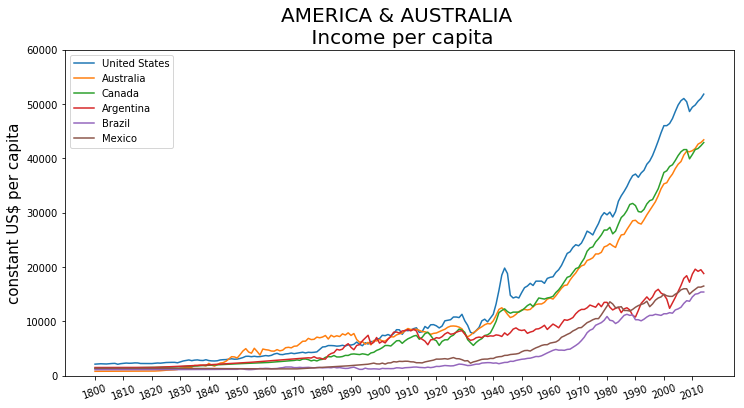

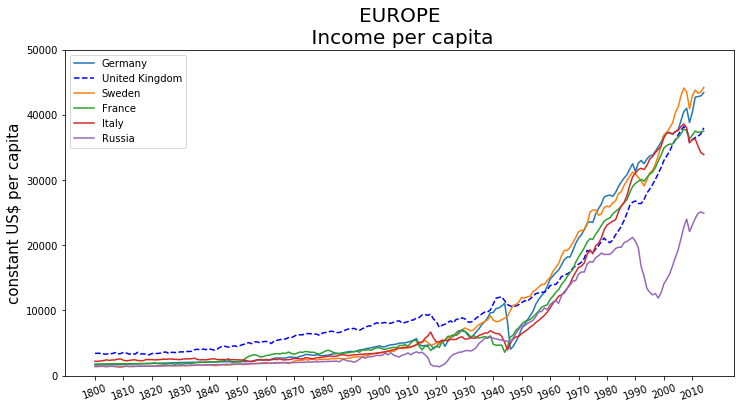

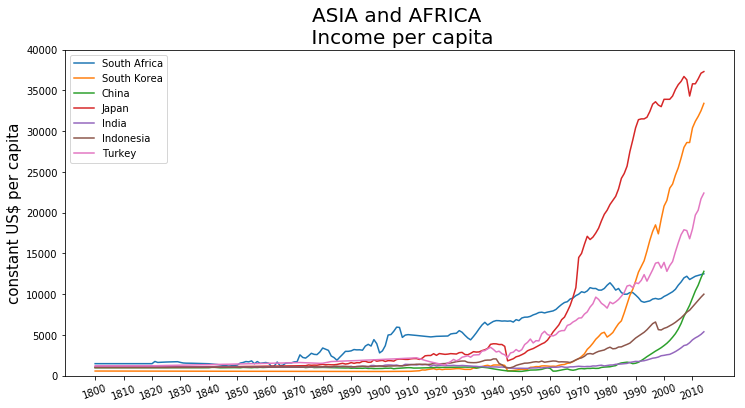

In [151]:
plt.figure(figsize=(12,6))
plt.title('AMERICA & AUSTRALIA \n Income per capita', fontsize=20)
plt.plot(income_per_person_df.loc['United States'],label = 'United States')
plt.plot(income_per_person_df.loc['Australia'],label = 'Australia')
plt.plot(income_per_person_df.loc['Canada'],label = 'Canada') 
plt.plot(income_per_person_df.loc['Argentina'],label = 'Argentina')
plt.plot(income_per_person_df.loc['Brazil'],label = 'Brazil')
plt.plot(income_per_person_df.loc['Mexico'],label = 'Mexico')
plt.xticks(np.arange(1800,2014,10), np.arange(1800,2014,10), rotation=20, fontsize='10')
plt.legend(loc= 'upper left')
plt.ylabel('constant US$ per capita', fontsize=15)
plt.ylim(0,60000)
plt.show()

plt.figure(figsize=(12,6))
plt.title('EUROPE\n Income per capita', fontsize=20)
plt.plot(income_per_person_df.loc['Germany'],label = 'Germany')
plt.plot(income_per_person_df.loc['United Kingdom'],'b--', label = 'United Kingdom')
plt.plot(income_per_person_df.loc['Sweden'],label = 'Sweden')
plt.plot(income_per_person_df.loc['France'],label = 'France')
plt.plot(income_per_person_df.loc['Italy'],label = 'Italy')
plt.plot(income_per_person_df.loc['Russia'],label = 'Russia')
#plt.plot(income_per_person_df.loc['Netherlands'],label = 'Netherlands')
plt.xticks(np.arange(1800,2014,10), np.arange(1800,2014,10), rotation=20, fontsize='10')
plt.legend(loc= 'upper left')
plt.ylabel('constant US$ per capita', fontsize=15)
plt.ylim(0,50000)
plt.show()

plt.figure(figsize=(12,6))
plt.title('ASIA and AFRICA \n Income per capita',fontsize=20)
plt.plot(income_per_person_df.loc['South Africa'],label = 'South Africa')
plt.plot(income_per_person_df.loc['South Korea'],label = 'South Korea')
plt.plot(income_per_person_df.loc['China'],label = 'China')
plt.plot(income_per_person_df.loc['Japan'],label = 'Japan')
plt.plot(income_per_person_df.loc['India'],label = 'India')
plt.plot(income_per_person_df.loc['Indonesia'],label = 'Indonesia')
plt.plot(income_per_person_df.loc['Turkey'],label = 'Turkey')
plt.xticks(np.arange(1800,2014,10), np.arange(1800,2014,10), rotation=20, fontsize='10')
plt.legend(loc= 'upper left')
plt.ylabel('constant US$ per capita', fontsize=15)
plt.ylim(0,40000)
plt.show()

***The long-term national income per capita data for G20 countries show a positive trend with accelerating growth after World War 2.***  From the 19th century until World War 1 industrializing countries in Europe, America, Australia, Japan and South Africa experienced rises in income. The interwar period with the world economic crisis in the early 1930s show dropping income levels. After some volatility during World War 2, growth in North America, Europe, Turkey and Japan picked up again in the late 1940s and 1950s. In the 1960s growth in new emerging markets like Brazil and South Korea picked up. The oil crisis in the 1970s was accompanied by slow income growth in advanced economies. Income growth in advanced economies accelerated again in the 1980s. In the 1990s growth in China and India gained momentum, while income levels in post-Communist Russia dropped significantly. The first decade of the 21st century saw strong income growth in all G20 countries until the global financial crisis hit in 2008-09. However, in 2010-14 positive income growth returned in most G20 countries (except Italy).

Next, let us look at a histogram of the 2014 CO2 emission data. Do we find evidence for a correlation between national income and CO2 emissions? Do wealthy countries emit more greenhouse gas than poorer countries?

In [1]:
fig, ax = plt.subplots(figsize=(10,7))

ax.annotate("USA",fontsize=15,
            xy=(co2_emissions_per_person_df.loc['United States'][214], 7), xycoords='data',
            xytext=(18, 30), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )
ax.annotate("UK",fontsize=15,
            xy=(co2_emissions_per_person_df.loc['United Kingdom'][214], 20), xycoords='data',
            xytext=(7, 50), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

ax.annotate("France",fontsize=15,
            xy=(co2_emissions_per_person_df.loc['France'][214], 30), xycoords='data',
            xytext=(5, 80), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

ax.annotate("Germany",fontsize=15,
            xy=(co2_emissions_per_person_df.loc['Germany'][214], 10), xycoords='data',
            xytext=(12, 50), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

ax.annotate("China",fontsize=15,
            xy=(co2_emissions_per_person_df.loc['China'][214], 15), xycoords='data',
            xytext=(10, 70), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

ax.annotate("Qatar",fontsize=15,
            xy=(co2_emissions_per_person_df.loc['Qatar'][214], 2), xycoords='data',
            xytext=(45, 20), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

ax.annotate("India",fontsize=15,
            xy=(co2_emissions_per_person_df.loc['India'][214],80), xycoords='data',
            xytext=(4, 90), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

ax.annotate("South\n Korea",fontsize=15,
            xy=(co2_emissions_per_person_df.loc['South Korea'][214],5), xycoords='data',
            xytext=(12, 20), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

ax.annotate("United Arab Emirates",fontsize=15,
            xy=(co2_emissions_per_person_df.loc['United Arab Emirates'][214], 2), xycoords='data',
            xytext=(24, 20), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.hist(co2_emissions_per_person_df['2014'], bins=25, normed=False, facecolor='green', alpha=1)
plt.xlabel('CO2 [metric tonnes]', fontsize=15)
plt.ylabel('# of Countries', fontsize=15)
plt.title('Histogram\n CO2 EMISSIONS per capita\n(2014)', fontsize=15)

plt.axis([0, 50, 0, 100])
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined

A **histogram** is a useful representation of the distribution of CO2 data in a given year. For 2014, it groups the CO2 emission values of all 191 countries into 25 bins. The histogram shows that approx. 80 countries reported CO2 emissions between 0 and 2 tonnes, incl. India. ***The distribution has an exponential or geometric shape***. Most countries report low CO2 emission levels, while some wealthy countries report much higher emissions per capita. 

In [153]:
# Print the national CO2 emissions in 2014 for the G20 countries
for country in G20_countries:
    print(country, co2_emissions_per_person_df['2014'][country])

Argentina 4.75
Australia 15.4
Brazil 2.59
Canada 15.1
China 7.4
France 4.72
Germany 8.83
India 1.73
Indonesia 1.82
Italy 5.38
Japan 9.47
South Korea 11.7
Mexico 3.87
Russia 11.9
Saudi Arabia 19.5
South Africa 8.98
Turkey 4.49
United Kingdom 6.46
United States 16.5


Let us look at the development of national CO2 emission data time series.

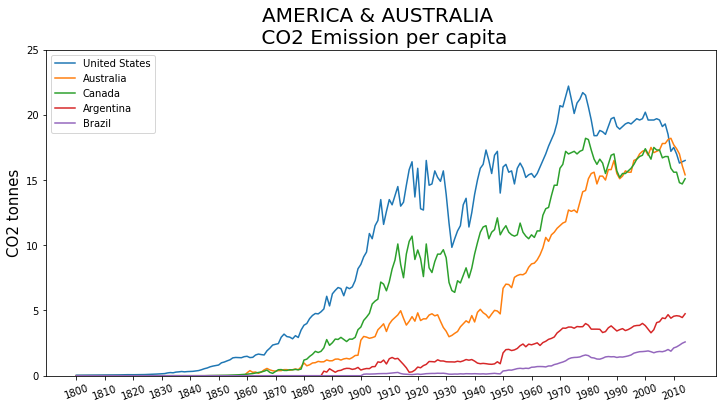

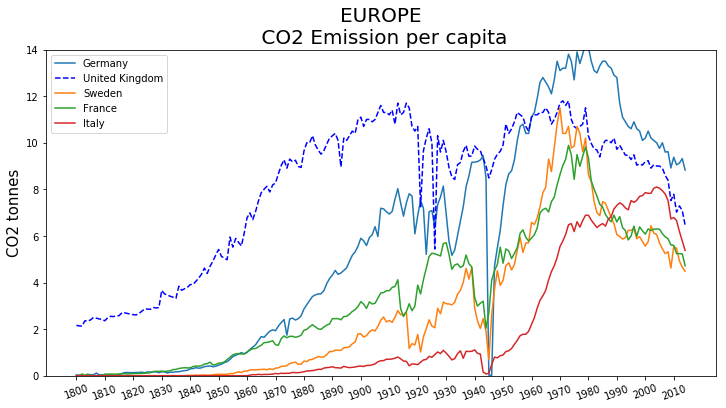

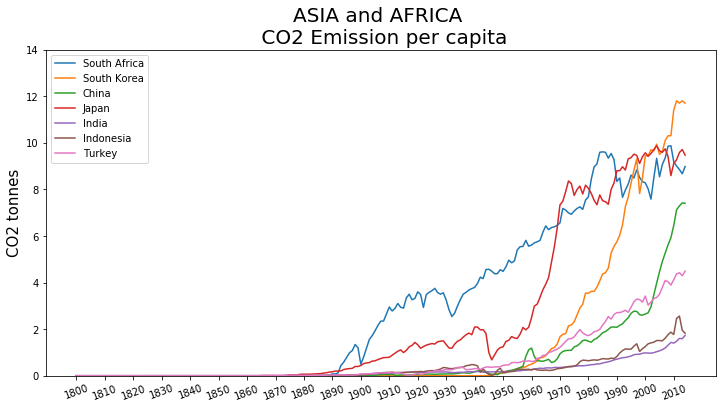

In [154]:
plt.figure(figsize=(12,6))
plt.title('AMERICA & AUSTRALIA \n CO2 Emission per capita', fontsize=20)
plt.plot(co2_emissions_per_person_df.loc['United States'],label = 'United States')
plt.plot(co2_emissions_per_person_df.loc['Australia'],label = 'Australia')
plt.plot(co2_emissions_per_person_df.loc['Canada'],label = 'Canada') 
plt.plot(co2_emissions_per_person_df.loc['Argentina'],label = 'Argentina')
plt.plot(co2_emissions_per_person_df.loc['Brazil'],label = 'Brazil')
plt.xticks(np.arange(1800,2014,10), np.arange(1800,2014,10), rotation=20, fontsize='10')
plt.legend(loc= 'upper left')
plt.ylabel('CO2 tonnes', fontsize=15)
plt.ylim(0,25)
plt.show()

plt.figure(figsize=(12,6))
plt.title('EUROPE\n CO2 Emission per capita', fontsize=20)
plt.plot(co2_emissions_per_person_df.loc['Germany'],label = 'Germany')
plt.plot(co2_emissions_per_person_df.loc['United Kingdom'],'b--', label = 'United Kingdom')
plt.plot(co2_emissions_per_person_df.loc['Sweden'],label = 'Sweden')
plt.plot(co2_emissions_per_person_df.loc['France'],label = 'France')
plt.plot(co2_emissions_per_person_df.loc['Italy'],label = 'Italy')
#plt.plot(co2_emissions_per_person_df.loc['Russia'],label = 'Russia')
plt.xticks(np.arange(1800,2014,10), np.arange(1800,2014,10), rotation=20, fontsize='10')
plt.legend(loc= 'upper left')
plt.ylabel('CO2 tonnes', fontsize=15)
plt.ylim(0,14)
plt.show()

plt.figure(figsize=(12,6))
plt.title('ASIA and AFRICA \n CO2 Emission per capita',fontsize=20)
plt.plot(co2_emissions_per_person_df.loc['South Africa'],label = 'South Africa')
plt.plot(co2_emissions_per_person_df.loc['South Korea'],label = 'South Korea')
plt.plot(co2_emissions_per_person_df.loc['China'],label = 'China')
plt.plot(co2_emissions_per_person_df.loc['Japan'],label = 'Japan')
plt.plot(co2_emissions_per_person_df.loc['India'],label = 'India')
plt.plot(co2_emissions_per_person_df.loc['Indonesia'],label = 'Indonesia')
plt.plot(co2_emissions_per_person_df.loc['Turkey'],label = 'Turkey')
plt.xticks(np.arange(1800,2014,10), np.arange(1800,2014,10), rotation=20, fontsize='10')
plt.legend(loc= 'upper left')
plt.ylabel('CO2 tonnes', fontsize=15)
plt.ylim(0,14)
plt.show()

From the 19th century until World War 1 industrializing countries in the Europe and the Americas as well as Australia, Japan and South Africa experienced rapid rises in CO2 emissions. The interwar period with the world economic crisis in the early 1930s show declining CO2 emissions. After some volatility during World War 2, growth in CO2 emissions picked up again in the 1950s and 1960s. **The 1970s mark a major turning point in CO2 emission growth**. Advanced nations affected by the two-oil crisis started reducing emissions thereafter while the CO2 growth of emerging economies picked up momentum.     

***Research Question (1):  ***  

***Summary *** 
>All G20 countries have increased income levels significantly since starting industrialization. Some emerging economies like China started late but experience similar steep growth paths as Japan and South Korea decades before. However, most G20 emerging markets like India, Indonesia, South Africa, Argentina, Brazil and Mexico keep growing at lower growth rates. Emissions of CO2 have risen in all countries. American and European advanced countries started reducing their high CO2 per capita emission levels after the oil price shock of the 1970s, while emerging markets and Asian advanced economies keep increasing CO2 emissions. Nowever, ***most emerging markets (except China) have not reached the CO2 per capita levels of advanved economies.***

### Research Question 2  (Correlation between CO2 emissions and GDP)

>What is the correlation between CO2 and income, and can we forecast future CO2 levels? 

Let us plot a scatter diagram of the CO2 and INCOME data frames. A **scatter diagram** is a type of plot using Cartesian coordinates to display values for typically two variables for a set of data. In our scatter plot each point represents a year, with the average of the 192 national income data on the x-axis and mean for the 192 CO2 emission data on the y-axis. The ratio of GDP divided by CO2 emissions is the **CO2 intensity of economic output** (e.g. GDP in constant USD per tonne of CO2 emissions).  

Let us include a linear regression line in our scatter plot as well.

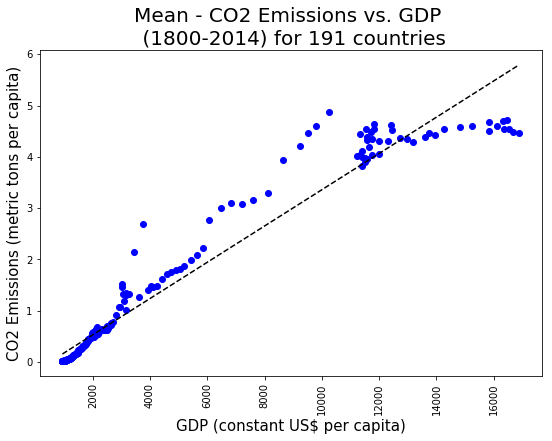

Linear regression
slope    :  0.00035
intercept: -0.17445
r_value  :  0.9732
p_value  :  6.106154794110736e-138 10
std_err  :  5.7225e-06
r-squared:  0.9471127946950542


In [155]:
X = income_per_person_df.mean(axis=0)
Y = co2_emissions_per_person_df.mean(axis=0)
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)

plt.figure(figsize=(9,6))
plt.title('Mean - CO2 Emissions vs. GDP \n (1800-2014) for 191 countries',fontsize=20)
plt.xlabel('GDP (constant US$ per capita)', fontsize=15)
plt.ylabel('CO2 Emissions (metric tons per capita)', fontsize=15)
plt.xticks(rotation='vertical')

coef = np.polyfit(X,Y,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(X,Y, 'bo', X, poly1d_fn(X), '--k')
plt.show()

print ('Linear regression')
print ('slope    : ', round (slope, 5))    # Slope of the regression line.
print ('intercept:',  round (intercept,5)) # Intercept of the regression line.
print ('r_value  : ', round (r_value,5))   # Correlation coefficient.
print ('p_value  : ', p_value,10)          # Two-sided p-value for a hypothesis test whose null hypothesis is that the slope
                                           # is zero, using Wald Test with t-distribution of the test statistic.
print ('std_err  : ', round (std_err,10))  # Standard error of the estimated gradient.
print ('r-squared: ', r_value**2)

The regression coefficient of +0.97 shows a **strong positive correlation between INCOME (exogenous variable) and CO2 emission (endogenous variable)**. We assume that national politics focus primarily on economic growth and greenhouse gas emissions follow as an unavoidable consequence. Nations choose their energy mix primarily on the grounds of price, availability and national security. Only recently have national politics started implementing meaningful targets for greenhouse gas emissions. 

The scatter plot shows some deviation from the linear trend, especially at mean income levels above USD 14,000. The increase in mean income from USD 14,000 to USD 16,000 in recent years was not accompanied by a strong increase in CO2 emissions. However, we see similar deviations from the long-term linear trend between USD 6,000 and USD 11,000 only to return to the linear trend between USD 12,000 and USD 14,000. 

Let us assume that we will see a return to the linear trend in the next 25 years. What is the implied CO2 emission if we use the forecast until 2040 in our original INCOME statistic? 


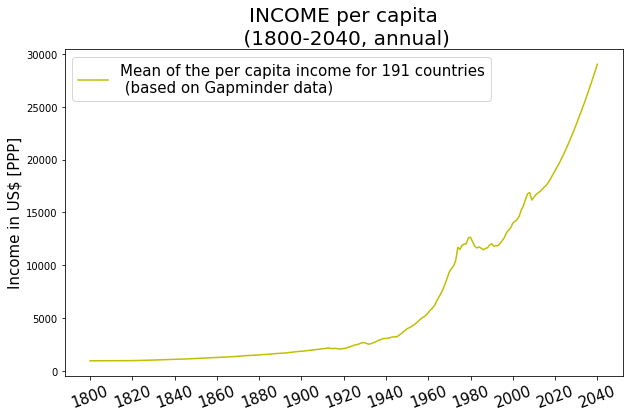

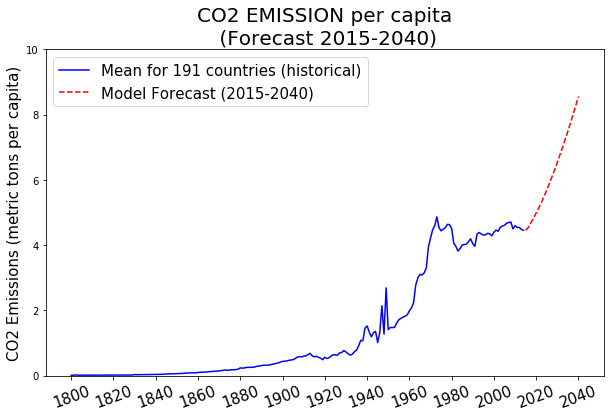

In [156]:
plt.figure(figsize=(10,6))
plt.title('INCOME per capita\n (1800-2040, annual)', fontsize=20)
plt.plot(income_long.mean(axis=0),'y-', label = 'Mean of the per capita income for 191 countries\n (based on Gapminder data)')
plt.legend(loc='best',fontsize=15)
plt.ylabel("Income in US$ [PPP]", fontsize=15)
plt.xticks(np.arange(1800,2041,20), np.arange(1800,2041,20), rotation=20, fontsize='15')
plt.show();

plt.figure(figsize=(10,6))
plt.title('CO2 EMISSION per capita\n (Forecast 2015-2040)',fontsize=20)
income_estimate = income_long.mean(axis=0)  # We use the copy of the original income statistic 1800-2040 incl. projections
co2_estimate    = slope * income_estimate + intercept  # we use the linear regression equation to forecast future CO2 levels
co2_forecast    = co2_estimate[215:]        # We display the 2015 - 2040 projections
co2_forecast   -= co2_estimate[215]-co2_emissions_per_person_df.mean(axis=0)[214] # start at the last observed value (2014) 

plt.plot(co2_emissions_per_person_df.mean(axis=0),'b-',label = 'Mean for 191 countries (historical)') 
plt.plot(co2_forecast, '--r',label = 'Model Forecast (2015-2040)')
plt.ylabel('CO2 Emissions (metric tons per capita)', fontsize=15)
plt.xticks(np.arange(1800,2041,20), np.arange(1800,2041,20), rotation=20, fontsize='15')
plt.legend(loc= 'upper left', fontsize='15')
plt.ylim(0,10)
plt.show()

In [157]:
# Model forecast build on a linear income/co2 relationship (i.e. constant CO2 intensity of economic output )
for year in range(2015,2041,5):
    print(year,': ', round(co2_forecast[str(year)],1),'metric tons per capita' )

2015 :  4.5 metric tons per capita
2020 :  5.0 metric tons per capita
2025 :  5.7 metric tons per capita
2030 :  6.5 metric tons per capita
2035 :  7.5 metric tons per capita
2040 :  8.6 metric tons per capita


Our model forecast shows **accelerating growth in mean CO2 emissions from 4.5 tonnes in 2015 to 8.6 tonnes in 2040**. Assuming a growing world population, this forecast implies a significant increase in Atmospheric CO2 levels from 407.65 parts per million (ppm) in Sept 2019 (Source: https://www.esrl.noaa.gov/gmd/ccgg/trends/global.html ). 
The Paris Agreement tries to limit Atmospheric CO2 levels to limit global warming by the end of the century to two degrees Celsius (3.6 degrees Fahrenheit) above preindustrial levels. Pledges made under the agreement should make sure that global emissions in 2030 will fall between 53 to 55.5 billion tons of CO2 equivalent ( https://www.nationalgeographic.com/news/2017/10/paris-agreement-climate-change-usa-nicaragua-policy-environment/ ) . 

How can the desire for rising income and the need to curb emissions be met? Let us turn to individual G20 countries and how they managed to combine those two conflicting goals. We start with a list of emerging market countries.


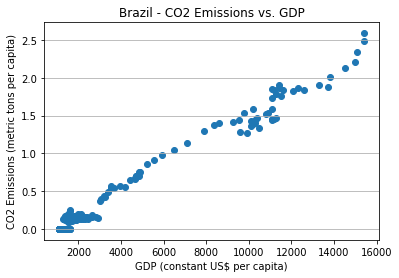

Brazil Correlation
[[1.         0.99180315]
 [0.99180315 1.        ]]


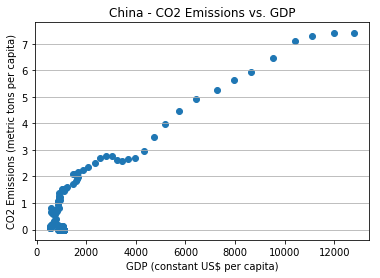

China Correlation
[[1.         0.93385419]
 [0.93385419 1.        ]]


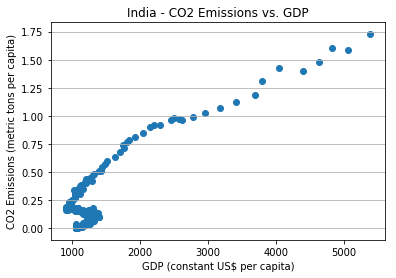

India Correlation
[[1.         0.90802651]
 [0.90802651 1.        ]]


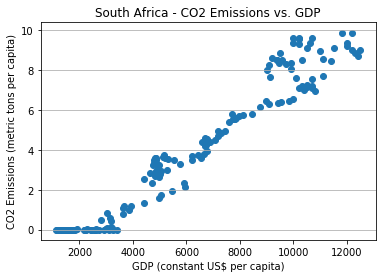

South Africa Correlation
[[1.         0.97775795]
 [0.97775795 1.        ]]


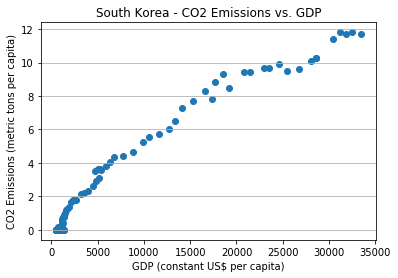

South Korea Correlation
[[1.         0.98181961]
 [0.98181961 1.        ]]


In [158]:
countrylist=['Brazil','China','India','South Africa','South Korea']

for country in countrylist:
    fig, axis = plt.subplots()
    axis.yaxis.grid(True)
    axis.set_title(country + ' - CO2 Emissions vs. GDP',fontsize=12)
    axis.set_xlabel('GDP (constant US$ per capita)',fontsize=10)
    axis.set_ylabel('CO2 Emissions (metric tons per capita)',fontsize=10)
    X = income_per_person_df.loc[country]
    Y = co2_emissions_per_person_df.loc[country]
    axis.scatter(X, Y)
    plt.show()
    print(country+' Correlation')
    print(np.corrcoef(income_per_person_df.loc[country], co2_emissions_per_person_df.loc[country]))

The emerging market countries (incl. South Korea) show a very high correlation between CO2 emissions and GDP per capita. The correlation coefficient varies between +0.91 for India and +0.99 for Brazil.  

How do advanced economies with higher GDP per capita levels compare?

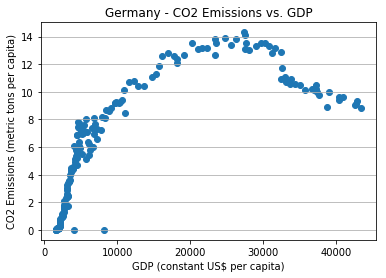

Germany Correlation
[[1.         0.76759502]
 [0.76759502 1.        ]]


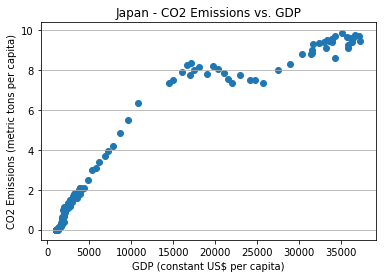

Japan Correlation
[[1.         0.96391449]
 [0.96391449 1.        ]]


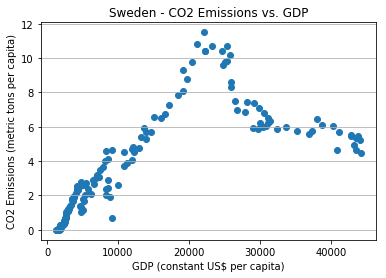

Sweden Correlation
[[1.         0.78716627]
 [0.78716627 1.        ]]


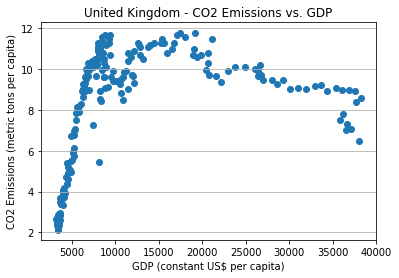

United Kingdom Correlation
[[1.         0.40770742]
 [0.40770742 1.        ]]


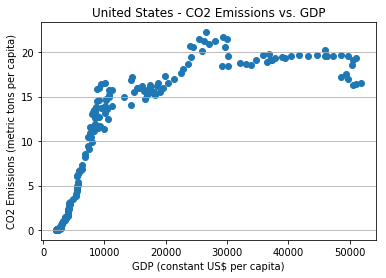

United States Correlation
[[1.         0.80392377]
 [0.80392377 1.        ]]


In [159]:
countrylist=['Germany','Japan','Sweden','United Kingdom','United States']

for country in countrylist:
    fig, axis = plt.subplots()
    axis.yaxis.grid(True)
    axis.set_title(country + ' - CO2 Emissions vs. GDP',fontsize=12)
    axis.set_xlabel('GDP (constant US$ per capita)',fontsize=10)
    axis.set_ylabel('CO2 Emissions (metric tons per capita)',fontsize=10)
    X = income_per_person_df.loc[country]
    Y = co2_emissions_per_person_df.loc[country]
    axis.scatter(X, Y)
    plt.show()
    print(country+' Correlation')
    print(np.corrcoef(income_per_person_df.loc[country], co2_emissions_per_person_df.loc[country]))
    

The advanced economies in the G20 show positive correlations between CO2 emissions and national income, but the correlation coefficients are lower than for the G20 emerging markets. They vary between +0.41 for the United Kingdom and +0.96 for Japan. 

Most advanced G20 economies show a ***flattening of CO2 growth or declining CO2 emissions when income levels exceed USD 20,000***. Those economies have avoided falling into the so-called **'middle-income trap'**. The central thesis is that during the initial stages of development low-income countries compete in international markets by producing labour-intensive, low-cost products using imported technologies. Large productivity gains can be achieved initially through the reallocation of labour from low-productivity agricultural sectors to higher-productivity manufacturing sectors. Once these countries reach a middle-income level, the pool of underemployed rural workers drains, wages begin to rise, which erodes competitiveness. Productivity gains from sectoral reallocation and technological catch-up are after a time exhausted. Wages then stagnate (or get trapped) between USD 16,000 to USD 17,000 (in constant 2005 international prices), hence the term ‘middle-income’ trap (Eichengreen, B, Park, D and Shin, K, 2012, ‘When Fast Growing Economies Slow Down: International Evidence and Implications for China https://www.mitpressjournals.org/doi/10.1162/ASEP_a_00118).

However, avoiding that middle-income trap is difficult. The World Bank estimates that of 101 middle-income countries in 1960, only 13 became high income by 2008 (Equatorial Guinea, Greece, Hong Kong, Ireland, Israel, Japan, Mauritius, Portugal, Puerto Rico, South Korea, Singapore, Spain, and Taiwan. (Agenor P.R, Otaviano C, and Jelenic M, 2012 ‘Avoiding Middle-Income Growth Traps, 
http://documents.worldbank.org/curated/en/422121468155111398/Avoiding-middle-income-growth-traps ).

**Research Question (2): **
>***Correlation between CO2 and income, and forecast of future CO2 levels***


***Summary***
>The long-term correlation analysis of CO2 emissions and income shows positive correlation coefficients for G20 countries. While emerging market economies show high correlation coefficients above +0.9, the synchronisation for most advanced economies is lower. Income levels above the ***'income trap'*** around USD 17,000 PPP are typically associated with ***improvements in CO2 intensity of economic output*** (i.e. more income per tonne of CO2 emission). Germany, Sweden and the United Kingdom show ***humped CO2 to Income scatter plots*** that results when the CO2 emissions on medium income levels are significantly higher than the emission levels at both lower and higher income. 

>We have built a forecast model for average global CO2 emissions based on the long-term linear relationship between national income and CO2 emissions for 191 countries. The Gapminder income statistic forecasts a doubling of global mean income from the observed level of approx. USD 15,000 in 2014 to approx. USD 30,000 in 2040. Correspondingly, our linear extrapolation model predicts mean CO2 per capita levels to rise from the observed 4.5 tonnes in 2014 to approx. 8.6 tonnes in 2040. However, the Gapminder income forecast assumes that emerging economies will be able to overcome the 'middle-income trap' and our linear forecast model does not factor in further improvements in CO2 intensity of economic output.   
  

### Research Question 3  (How does the Composition of Energy Supply affect  CO2 emissions)

>Countries choose a mix of primary energy sources to generate electricity and heat for domestic consumption. The industrial revolution replaced biofueles with coal as the most important source of primary energy, later to be sublemented by natural gas and mineral oil, the latter primary for transportation. In the 1970, zero-emission nuclear electricity generation gained popularity.

>**Question:** 

>***What are the statistical relationships between coal consumption and co2 emissions as well as nuclear electricity consumption and CO2 emissions?***

Let us start by looking at the COAL CONSUMPTION data at different points in time. The boxplot chart provides a summary of the distribution of the data.

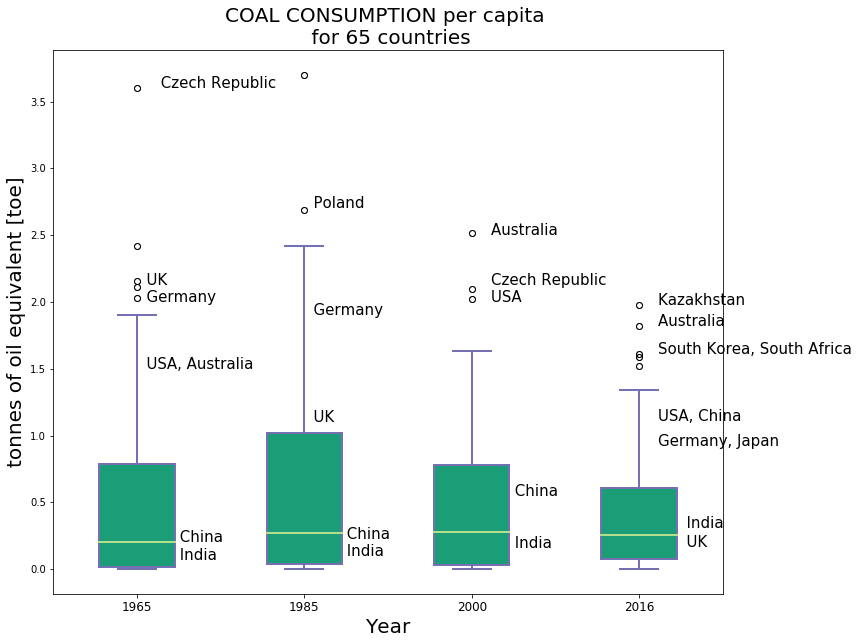

In [163]:
coal_per_person_df = coal_per_person_df.fillna(0) # Relpacing NAN values with Zeros
data_to_plot = [coal_per_person_df['1965'],coal_per_person_df['1985'],coal_per_person_df['2000'],coal_per_person_df['2016'] ]

# Create a figure instance
fig = plt.figure(1, figsize=(12, 10))
# Create an axes instance
ax = fig.add_subplot(111)
# Create the boxplot
bp = ax.boxplot(data_to_plot)
plt.title('COAL CONSUMPTION per capita \n for 65 countries',fontsize=20)
plt.xlabel('Year',fontsize=20);
plt.ylabel('tonnes of oil equivalent [toe]',fontsize=20)

## Remove top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
## add patch_artist=True option to ax.boxplot() 
## to get fill color
bp = ax.boxplot(data_to_plot, patch_artist=True)
## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)
## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)
## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
ax.set_xticklabels(['1965', '1985', '2000', '2016'],fontsize=12)
plt.annotate('    Kazakhstan', (4, coal_per_person_df.loc['Kazakhstan'][51]), fontsize=15)
plt.annotate('    Australia', (4, coal_per_person_df.loc['Australia'][51]), fontsize=15)
plt.annotate('    South Korea, South Africa', (4, coal_per_person_df.loc['South Korea'][51]), fontsize=15)
plt.annotate('    USA, China', (4, coal_per_person_df.loc['United States'][51]), fontsize=15)
plt.annotate('    Germany, Japan', (4, coal_per_person_df.loc['Germany'][51]), fontsize=15)
plt.annotate('          UK', (4, coal_per_person_df.loc['United Kingdom'][51]), fontsize=15)
#plt.annotate('          Indonesia', (4 , coal_per_person_df.loc['Indonesia'][51]), fontsize=15)
plt.annotate('          India', (4, coal_per_person_df.loc['India'][51]), fontsize=15)
plt.annotate('  UK\n  Germany', (1, 2.0), fontsize=15)
plt.annotate('     Czech Republic ', (1, 3.6), fontsize=15)
plt.annotate('  USA, Australia', (1, 1.5), fontsize=15)
plt.annotate('         China\n         India', (1, 0.0714), fontsize=15)
plt.annotate('  Poland', (2, 2.7), fontsize=15)
plt.annotate('  Germany', (2, 1.9), fontsize=15)
plt.annotate('  UK', (2, 1.1), fontsize=15)
plt.annotate('    Australia', (3, 2.5), fontsize=15)
plt.annotate('    Czech Republic\n    USA', (3, 2.0), fontsize=15)
plt.annotate('         China\n         India', (2, 0.0943), fontsize=15)
plt.annotate('         India', (3, 0.156), fontsize=15)
plt.annotate('         China', (3, 0.55), fontsize=15);

The median of the COAL CONSUMPTION per capita data between 1965 and 2016 for 65 countries remains almost constant at approx. 0.2 tonnes of oil equivalent (toe). The distributions for 1965, 1985, 2000 and 2016 vary in their shapes with decreasing standard deviation after 1985. The distributions are biased to the upside with strong outliers multiple standard deviations higher than the mean. ***Several G20 countries like Japan, Germany, USA, Australia, South Africa and South Korea are heavy users of coal with consumptions above 1 toe per year.*** China's consumption has risen strongly while former Communist countries like Czech Republic, Poland and Kazakhstan reduced their very high coal consumptions. The UK was a heavy user of coal and phased out most of its demand by 2016.   

In [164]:
coal_per_person_df.describe()

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,...,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,0.562399,0.554216,0.541194,0.550983,0.553310,0.536940,0.519127,0.511368,0.517617,0.517944,...,0.525226,0.518003,0.475374,0.494286,0.499436,0.491365,0.479969,0.471112,0.453529,0.440769
std,0.771710,0.759390,0.741053,0.761146,0.771029,0.758801,0.756680,0.749703,0.741387,0.737677,...,0.605526,0.604570,0.567403,0.579253,0.574510,0.547289,0.538053,0.539306,0.510944,0.502162
min,0.000270,0.000270,0.000270,0.000270,0.000270,0.000270,0.000270,0.000270,0.000270,0.000270,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.015500,0.016000,0.019000,0.019400,0.019000,0.015900,0.013800,0.013800,0.021600,0.021900,...,0.060500,0.065900,0.057000,0.068100,0.077800,0.076900,0.089700,0.083000,0.073400,0.077000
50%,0.205000,0.187000,0.187000,0.180000,0.184000,0.201000,0.206000,0.181000,0.216000,0.217000,...,0.292000,0.265000,0.237000,0.264000,0.273000,0.275000,0.253000,0.262000,0.295000,0.258000
75%,0.785000,0.776000,0.760000,0.787000,0.747000,0.729000,0.687000,0.630000,0.605000,0.642000,...,0.851000,0.745000,0.729000,0.721000,0.684000,0.686000,0.630000,0.609000,0.612000,0.606000
max,3.600000,3.590000,3.470000,3.590000,3.740000,3.780000,3.930000,3.850000,3.750000,3.710000,...,2.510000,2.570000,2.440000,2.230000,2.180000,2.160000,2.110000,2.340000,2.020000,1.980000


Let us look at the national time series.

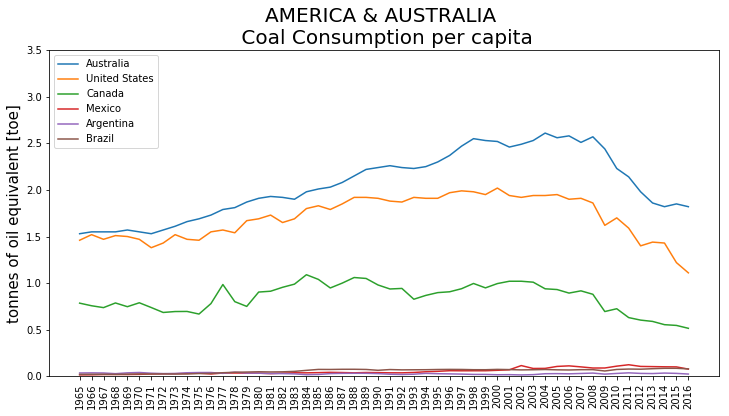

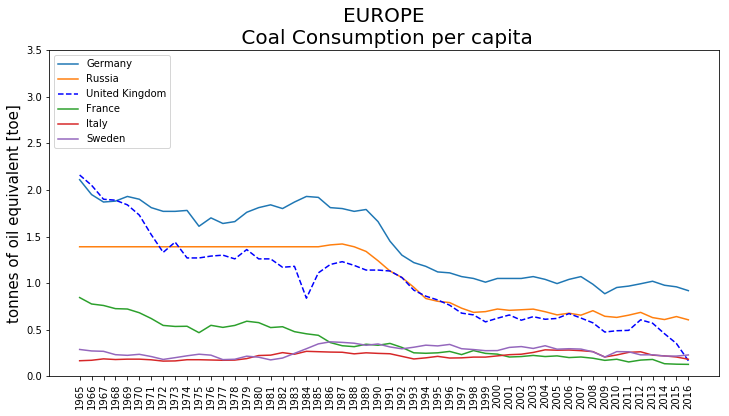

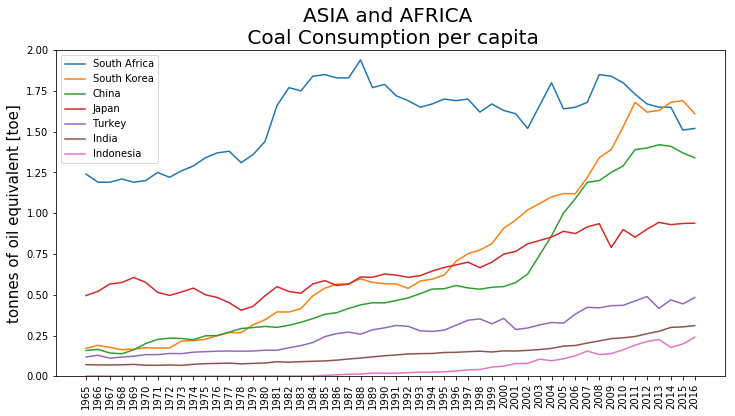

In [166]:
plt.figure(figsize=(12,6))
plt.title('AMERICA & AUSTRALIA \n Coal Consumption per capita', fontsize=20)
plt.plot(coal_per_person_df.loc['Australia'],label = 'Australia')
plt.plot(coal_per_person_df.loc['United States'],label = 'United States')
plt.plot(coal_per_person_df.loc['Canada'],label = 'Canada')  
plt.plot(coal_per_person_df.loc['Mexico'],label = 'Mexico')
plt.plot(coal_per_person_df.loc['Argentina'],label = 'Argentina')
plt.plot(coal_per_person_df.loc['Brazil'],label = 'Brazil')
plt.legend(loc= 'upper left')
plt.ylabel('tonnes of oil equivalent [toe]', fontsize=15)
plt.ylim(0,3.5)
plt.xticks(rotation='vertical')
plt.show()

plt.figure(figsize=(12,6))
plt.title('EUROPE\n Coal Consumption per capita', fontsize=20)
plt.plot(coal_per_person_df.loc['Germany'],label = 'Germany')
plt.plot(coal_per_person_df.loc['Russia'],label = 'Russia')
plt.plot(coal_per_person_df.loc['United Kingdom'],'b--', label = 'United Kingdom')
plt.plot(coal_per_person_df.loc['France'],label = 'France')
plt.plot(coal_per_person_df.loc['Italy'],label = 'Italy')
plt.plot(coal_per_person_df.loc['Sweden'],label = 'Sweden')
plt.legend(loc= 'upper left')
plt.ylabel('tonnes of oil equivalent [toe]', fontsize=15)
plt.ylim(0,3.5)
plt.xticks(rotation='vertical')
plt.show()

plt.figure(figsize=(12,6))
plt.title('ASIA and AFRICA \n Coal Consumption per capita',fontsize=20)
plt.plot(coal_per_person_df.loc['South Africa'],label = 'South Africa')
plt.plot(coal_per_person_df.loc['South Korea'],label = 'South Korea')
plt.plot(coal_per_person_df.loc['China'],label = 'China')
plt.plot(coal_per_person_df.loc['Japan'],label = 'Japan')
plt.plot(coal_per_person_df.loc['Turkey'],label = 'Turkey')
plt.plot(coal_per_person_df.loc['India'],label = 'India')
plt.plot(coal_per_person_df.loc['Indonesia'],label = 'Indonesia')

plt.legend(loc= 'upper left')
plt.ylabel('tonnes of oil equivalent [toe]', fontsize=15)
plt.ylim(0,2)
plt.xticks(rotation='vertical')
plt.show()

The industrialized countries of North America, Europe and Australia used to rely heavily on coal for industrial use, heating and electric power generation. However, their coal consumption peaked in the 1980s and started declining thereafter. The United Kingdom, once a leading coal producer and consumer in the 19th century, continuously reduced its dependency on coal in the last 50 years. 

In contrast, coal consumption in China, India and Indonesia keeps increasing, albeit from a low base. Nevertheless, China has surpased Japan already, making her the largest producer and consumer of coal in the world and the largest user of coal-derived electricity. South Africa is a major global coal producer and its domestic coal consumption remains at a high level. The increase in Japanese and South Korean coal consumption is surprising as both countries import most of the coal they consume while China and India are major coal producers (Source: IEA). Nevertheless, seaborne coal from nearby Australia and Indonesia is price competitive and readily available in Korean and Japanese urban centres located near the sea.   

We would like to run regressions of COAL CONSUMPTION and CO2 EMISSIONS for G20 countries and plot Boxplot diagrams. Therefore, we need to make sure that both data frames have the same format 1965-2014.

In [167]:
for n in range (1800,1965):
    co2_emissions_per_person_df.drop([str(n)], axis=1, inplace=True)    
    
for i in range (2015,2017):
    coal_per_person_df.drop([str(i)], axis=1, inplace=True)   

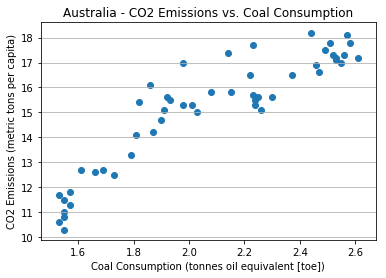

Australia Correlation
[[1.         0.90638241]
 [0.90638241 1.        ]]


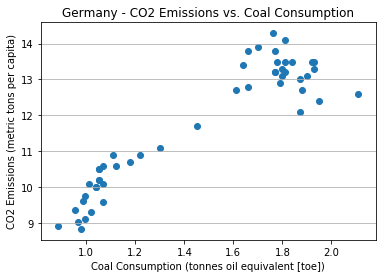

Germany Correlation
[[1.         0.93020195]
 [0.93020195 1.        ]]


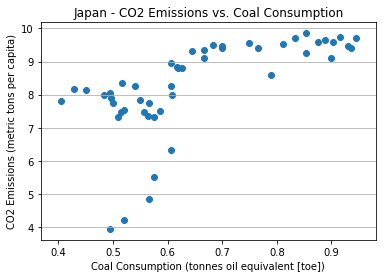

Japan Correlation
[[1.         0.64615628]
 [0.64615628 1.        ]]


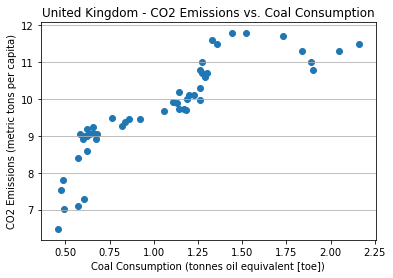

United Kingdom Correlation
[[1.        0.8648199]
 [0.8648199 1.       ]]


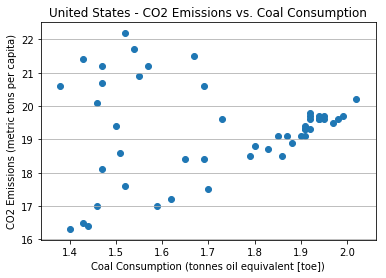

United States Correlation
[[1.         0.10555266]
 [0.10555266 1.        ]]


In [168]:
countrylist=['Australia','Germany','Japan','United Kingdom','United States']

for country in countrylist:
    fig, axis = plt.subplots()
    axis.yaxis.grid(True)
    axis.set_title(country + ' - CO2 Emissions vs. Coal Consumption',fontsize=12)
    axis.set_xlabel('Coal Consumption (tonnes oil equivalent [toe])',fontsize=10)
    axis.set_ylabel('CO2 Emissions (metric tons per capita)',fontsize=10)
    X = coal_per_person_df.loc[country]
    Y = co2_emissions_per_person_df.loc[country]
    axis.scatter(X, Y)
    plt.show()
    print(country+' Correlation')
    print(np.corrcoef(coal_per_person_df.loc[country], co2_emissions_per_person_df.loc[country]));
    

The correlations for European economies are high with coefficients above +0.8 which indicate strong linear relationships.
However, the analysis does not show a high coefficient for Japan (+0.6) and the relationsship for the USA is not statistically significant (+0.2). 

Let us compare the results for advanved economies with emerging markets.

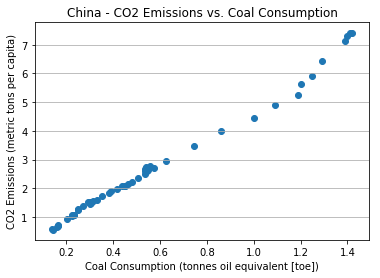

China Correlation
[[1.         0.99536077]
 [0.99536077 1.        ]]


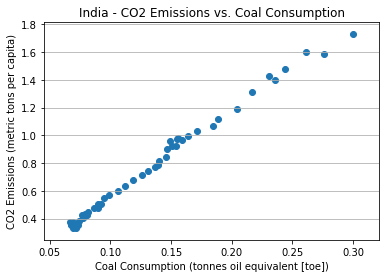

India Correlation
[[1.         0.99642406]
 [0.99642406 1.        ]]


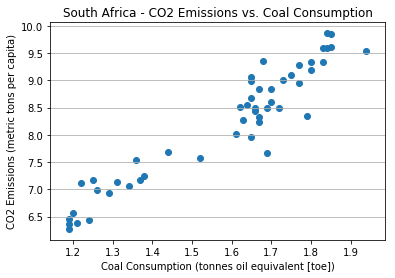

South Africa Correlation
[[1.       0.949456]
 [0.949456 1.      ]]


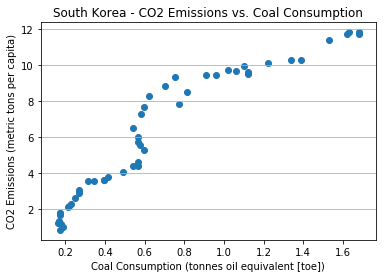

South Korea Correlation
[[1.      0.94637]
 [0.94637 1.     ]]


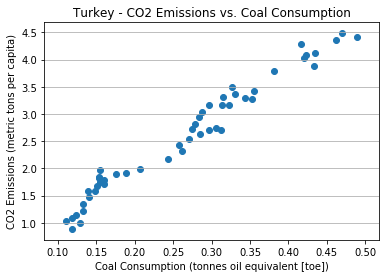

Turkey Correlation
[[1.         0.98326486]
 [0.98326486 1.        ]]


In [169]:
countrylist=['China','India','South Africa','South Korea', 'Turkey' ]

for country in countrylist:
    fig, axis = plt.subplots()
    axis.yaxis.grid(True)
    axis.set_title(country + ' - CO2 Emissions vs. Coal Consumption',fontsize=12)
    axis.set_xlabel('Coal Consumption (tonnes oil equivalent [toe])',fontsize=10)
    axis.set_ylabel('CO2 Emissions (metric tons per capita)',fontsize=10)
    X = coal_per_person_df.loc[country]
    Y = co2_emissions_per_person_df.loc[country]
    axis.scatter(X, Y)
    plt.show()
    print(country+' Correlation')
    print(np.corrcoef(coal_per_person_df.loc[country], co2_emissions_per_person_df.loc[country]));

The correlations for emerging market economies are very high with coefficients exceeding +0.94 . Coal is the prefered primary energy source for several emerging economies. The high coal consumption rates of up to 1.4 toe for China, 1.6 toe for South Korea and 2.0 toe for South Africa suggest that this countries generate most of their rising electricity demand by burning coal. 

Now let us turn to ***NUCLEAR ELECTRICITY PRODUCTION per capita***.

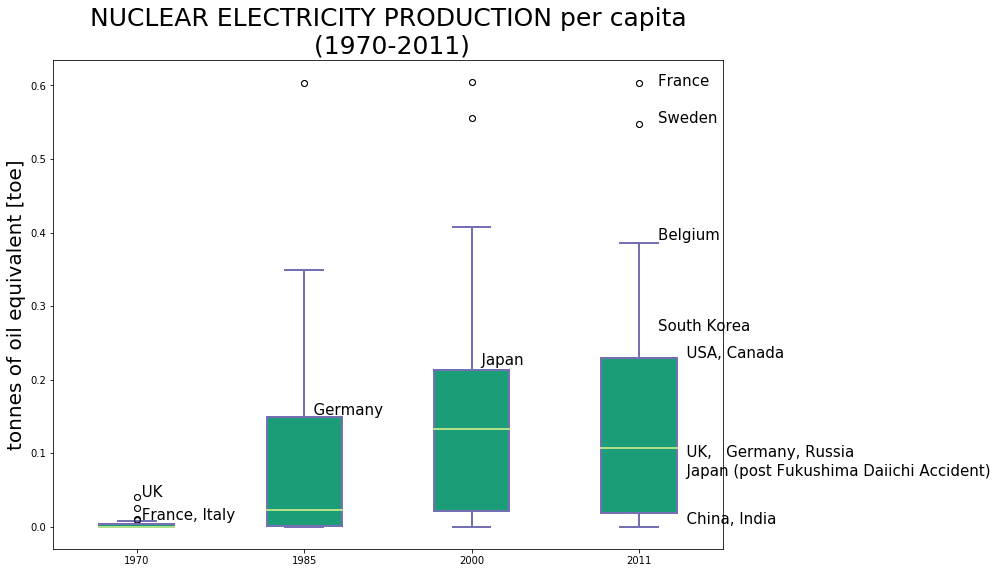

In [170]:
data_to_plot = [nuclear_per_person_df['1970'],nuclear_per_person_df['1985'],nuclear_per_person_df['2000'],nuclear_per_person_df['2011'] ]

# Create a figure instance
fig = plt.figure(1, figsize=(12, 9))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)
plt.title('NUCLEAR ELECTRICITY PRODUCTION per capita\n (1970-2011)', fontsize='25')
plt.ylabel('tonnes of oil equivalent [toe]', fontsize='20')
## Remove top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
## add patch_artist=True option to ax.boxplot() 
## to get fill color
bp = ax.boxplot(data_to_plot, patch_artist=True)
## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)
## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)
## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
ax.set_xticklabels(['1970', '1985', '2000', '2011'])
plt.annotate('    France', (4, 0.6), fontsize=15)
plt.annotate('    Sweden', (4, 0.55), fontsize=15)
plt.annotate('    Belgium', (4, 0.39), fontsize=15)
plt.annotate('    South Korea', (4, 0.267), fontsize=15)
plt.annotate('          USA, Canada', (4, 0.23), fontsize=15)
plt.annotate('  Germany', (2, 0.153), fontsize=15)
plt.annotate('          UK,   Germany, Russia', (4, 0.095), fontsize=15)
plt.annotate('          China, India', (4, 0.00474), fontsize=15)
plt.annotate('  Japan', (3, 0.22), fontsize=15)
plt.annotate('          Japan (post Fukushima Daiichi Accident)', (4, 0.0692), fontsize=15)
plt.annotate(' UK ', (1, 0.0402), fontsize=15)
plt.annotate(' France, Italy ', (1, 0.00967), fontsize=15);

The Boxplot diagrams show the distribution of the NUCLEAR ELECTRICITY PRODUCTION per capita data in different years. In 1970, only a few countries operated nuclear power plants with meaningful capacity (USSR not included in the data). However, ***the energy crisis in the 1970s let to a surge in nuclear power generation.*** By 1985, the median nuclear electricity production of the 31 countries did only rise to 0.02 tonnes of oil equivalent(toe), but the distribution start showing a strong upward bias. In countries like Belgium, France, Sweden and Germany nuclear power had become a major source of primary energy supply with more than 0.1 toe contribution. Despite the Chernobyl disaster in April, 1986, nuclear power generation increased globally. By 2000, the median of the 31 countries had risen to 0.13 toe and Japan's nuclear generation was close to the upper quantile at 0.21 toe. In 2011, Japan reduced nuclear power generation due to the Fukushima Daichi Accident. However, the shape of the distribution remained similar to 2000. France and Sweden remain outliers with very high nuclear power generations above 0.5 toe (equivalent to more than 50% of total electricity production). Belgium and South Korea were heavy users at 0.4 toe and 0.3 toe, respectively. The USA and Canada were close to the upper quartile at 0.23 toe. The UK, Germany and Russia had nuclear power productions close to the global medium at 0.1 toe (equivalent to approx. 20% of total electricity generation in this countries - source: World Nuclear Association). **In China and India, nuclear power generation does not account for a meaningful contribution to the power mix**.  

We notice a ***difference in scale between coal consumption and nuclear electricity consumption, both measured in tonnes of oil equivalent (toe)***. Apparenty, mean, standard deviation, upper and lower quartiles as well as max levels for the 61 countries in the coal statistic are approx. 3-times higher than the nuclear consumption data for 31 countries.  

In [114]:
nuclear_per_person_df['2011'].describe()

count    31.000000
mean      0.155024
std       0.160679
min       0.000000
25%       0.018050
50%       0.107000
75%       0.229500
max       0.603000
Name: 2011, dtype: float64

In [171]:
coal_per_person_df['2011'].describe()

count    61.000000
mean      0.499436
std       0.574510
min       0.000000
25%       0.077800
50%       0.273000
75%       0.684000
max       2.180000
Name: 2011, dtype: float64

For example, according to the World Nuclear Association, ***South Korea's 2016 electricity production*** was 563 TWh gross, with 235 TWh ***(42%) of this from coal***, 162 TWh ***(29%) from nuclear***, 127 TWh (22%) from gas, 18 TWh from oil, 7 TWh wind and solar, and 7 TWh from hydro. At the end of 2016 installed capacity was 111 GWe, comprising 35 GWe coal, 37 GWe gas, 23 GWe nuclear, 13 GWe hydro and other renewables, and 3 GWe oil. 
https://www.world-nuclear.org/information-library/country-profiles/countries-o-s/russia-nuclear-power.aspx

Let us compare this contribution to the national energy mix with our two statistics available for 2011.

In [183]:
print("South Korea's coal consumption in 2011               : ", coal_per_person_df.loc['South Korea']['2011'], 'tonnes of oil equivalent (toe)')
print("South Korea's nuclear electicity consumption in 2011 : ",nuclear_per_person_df.loc['South Korea']['2011'], 'tonnes of oil equivalent (toe)')


South Korea's coal consumption in 2011               :  1.68 tonnes of oil equivalent (toe)
South Korea's nuclear electicity consumption in 2011 :  0.267 tonnes of oil equivalent (toe)


Assuming that South Korea's energy mix did not change significantly between 2011 and 2016, we have to acknowledge coal's use outside electricity consumption. 

It is estimated that global cement production reached 4.1 gigatons (Gt) in 2018, with China producing the largest share. In 2010, China’s cement output was 1.9 gigatonnes, which accounted for 56% of world cement production. Therefore, in 2010 total CO2 emissions from Chinese cement production could had exceed 1.2 gigatonnes. Taking the World Bank estimate of China's population in 2010 of 1.338 billion, we can calculate the Chinese per capita CO2 emissions from cement production. 


In [194]:
pop_china_2010 = 1338000000     # Chinese pobulation 2010 1.338 billion
co2_china_fromCement_2010 = 1.9 # gigatons (Gt)
Gt = 1000000000                 # gigatons (Gt) = 1.000.000.000 tonnes
co2_china_fromCement_2010_perCapita = co2_china_fromCement_2010 * Gt / pop_china_2010 
print("China's 2010 CO2 emissions from cement production", round(co2_china_fromCement_2010_perCapita,2), 
      'tonnes of CO2 per capita')

China's 2010 CO2 emissions from cement production 1.42 tonnes of CO2 per capita


***Coal is used as the major energy source in cement production and large amounts of energy are required to produce cement.*** It takes about 200 kg of coal to produce one tonne of cement and about 300-400 kg of cement is needed to produce one cubic metre of concrete. Coal consumption is driven by demand for electricity and for construction. ***Nuclear power can substitute fossil fuels like coal in power generation but not in cement production***. China is the largest producer of cement, accounting for close to 60% of global production, followed by India at 7%. The CO2 intensity of producing cement remains fairly constant at 0.5 tonnes of CO2 per tonne of cement. 

Sources: 

https://www.worldcoal.org/coal/uses-coal/coal-cement )

https://eta.lbl.gov/sites/all/files/publications/6329_ep_cement_co2.pdf

https://www.iea.org/reports/tracking-industry-2019/cement

https://www.earth-syst-sci-data.net/10/2213/2018/essd-10-2213-2018.pdf

https://www.bbc.com/news/science-environment-46455844

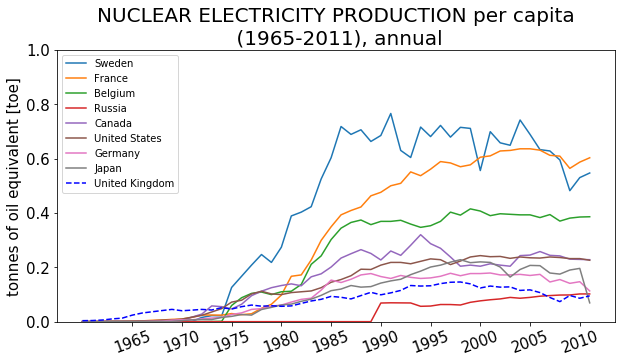

In [195]:
plt.figure(figsize=(10,5))
plt.title('NUCLEAR ELECTRICITY PRODUCTION per capita\n (1965-2011), annual', fontsize='20')
plt.plot(nuclear_per_person_df.loc['Sweden'],label = 'Sweden')
plt.plot(nuclear_per_person_df.loc['France'],label = 'France')
plt.plot(nuclear_per_person_df.loc['Belgium'],label = 'Belgium')
plt.plot(nuclear_per_person_df.loc['Russia'],label = 'Russia')
plt.plot(nuclear_per_person_df.loc['Canada'],label = 'Canada')  
plt.plot(nuclear_per_person_df.loc['United States'],label = 'United States')
plt.plot(nuclear_per_person_df.loc['Germany'],label = 'Germany')
plt.plot(nuclear_per_person_df.loc['Japan'],label = 'Japan')
plt.plot(nuclear_per_person_df.loc['United Kingdom'],'b--',label = 'United Kingdom')
plt.legend(loc= 'upper left')
plt.ylabel('tonnes of oil equivalent [toe]', fontsize='15')
plt.yticks(fontsize='15')
plt.xticks(np.arange(1965,2011,5), np.arange(1965,2011,5), rotation=20, fontsize='15')
plt.ylim(0,1);
#plt.show();


Let us look at the correlation of nuclear power generation and CO2 emissions. Therefore, we need to make sure that both data frames have the same format.

In [196]:
for n in range (1960,1965):
    nuclear_per_person_df.drop([str(n)], axis=1, inplace=True)
    
for i in range (2012,2015):
    co2_emissions_per_person_df.drop([str(i)], axis=1, inplace=True)
    

We consider countries with meaningful nuclear power generation in 2011. 

In [197]:
meaningful = nuclear_per_person_df['2011'] >0.09    # set a filter
nuclear_per_person_df['2011'][meaningful]

country
Belgium            0.3860
Bulgaria           0.1750
Canada             0.2280
Czech Republic     0.2310
Finland            0.3700
France             0.6030
Germany            0.1130
Hungary            0.1350
Russia             0.1020
Slovak Republic    0.2260
Slovenia           0.2630
South Korea        0.2670
Spain              0.1070
Sweden             0.5470
Switzerland        0.2980
Ukraine            0.1690
United Kingdom     0.0951
United States      0.2260
Name: 2011, dtype: float64

Let us look at the correlation coefficients for this list of countries.

In [198]:

countrylist1=['Belgium','Bulgaria','Canada','Czech Republic','Finland','France',
              'Germany','Hungary','Russia','Slovak Republic','Slovenia',
              'South Korea','Spain','Sweden','Switzerland',
              'Ukraine','United Kingdom','United States']


for country in countrylist1:
    
    print(country+' Correlation')
    X = nuclear_per_person_df.loc[country]
    Y = co2_emissions_per_person_df.loc[country]
    slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
    print ('r_value  : ', round (r_value,2), end="     ")  # Correlation coefficient.
    print ('std_err  : ', round (std_err,3), end="     ")  # Standard error of the estimated gradient.
    print ('r-squared: ', round((r_value**2),1))
    

Belgium Correlation
r_value  :  -0.76     std_err  :  0.805     r-squared:  0.6
Bulgaria Correlation
r_value  :  -0.3     std_err  :  2.898     r-squared:  0.1
Canada Correlation
r_value  :  0.27     std_err  :  1.71     r-squared:  0.1
Czech Republic Correlation
r_value  :  -0.72     std_err  :  3.489     r-squared:  0.5
Finland Correlation
r_value  :  0.56     std_err  :  1.266     r-squared:  0.3
France Correlation
r_value  :  -0.88     std_err  :  0.369     r-squared:  0.8
Germany Correlation
r_value  :  -0.64     std_err  :  2.737     r-squared:  0.4
Hungary Correlation
r_value  :  -0.61     std_err  :  2.234     r-squared:  0.4
Russia Correlation
r_value  :  -0.46     std_err  :  7.728     r-squared:  0.2
Slovak Republic Correlation
r_value  :  -0.69     std_err  :  2.092     r-squared:  0.5
Slovenia Correlation
r_value  :  0.92     std_err  :  1.924     r-squared:  0.8
South Korea Correlation
r_value  :  0.96     std_err  :  1.337     r-squared:  0.9
Spain Correlation
r_value  :

Let us visualize the scatterplot charts for European G20 countries and large EU members with the highest coefficients of determination (i.e. r-squared)

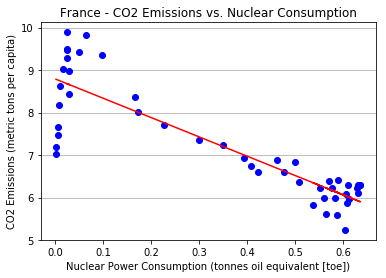

France Correlation
[[ 1.         -0.87810438]
 [-0.87810438  1.        ]]


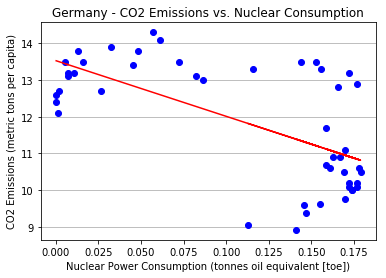

Germany Correlation
[[ 1.         -0.63602243]
 [-0.63602243  1.        ]]


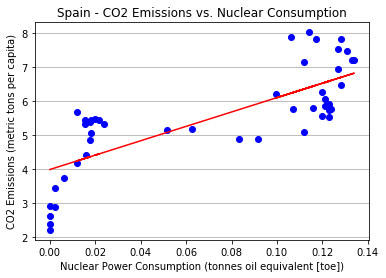

Spain Correlation
[[1.         0.76561854]
 [0.76561854 1.        ]]


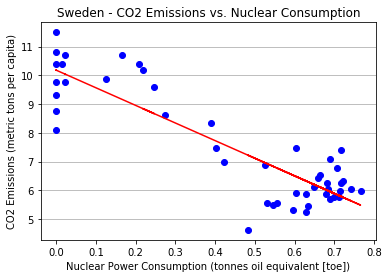

Sweden Correlation
[[ 1.         -0.87535769]
 [-0.87535769  1.        ]]


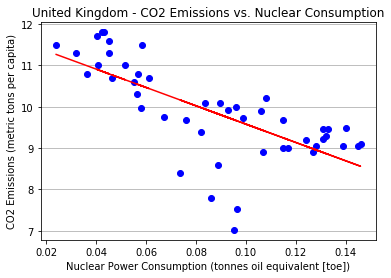

United Kingdom Correlation
[[ 1.         -0.69816749]
 [-0.69816749  1.        ]]


In [199]:
countrylist=['France','Germany','Spain','Sweden','United Kingdom']

for country in countrylist:
    fig, axis = plt.subplots()
    axis.yaxis.grid(True)
    axis.set_title(country + ' - CO2 Emissions vs. Nuclear Consumption',fontsize=12)
    axis.set_xlabel('Nuclear Power Consumption (tonnes oil equivalent [toe])',fontsize=10)
    axis.set_ylabel('CO2 Emissions (metric tons per capita)',fontsize=10)
    X = nuclear_per_person_df.loc[country]
    Y = co2_emissions_per_person_df.loc[country]
    #axis.scatter(X, Y)
    coef = np.polyfit(X,Y,1)
    poly1d_fn = np.poly1d(coef)
    plt.plot(X,Y, 'bo', X, poly1d_fn(X), 'r')
    plt.show()
    print(country+' Correlation')
    print(np.corrcoef(nuclear_per_person_df.loc[country], co2_emissions_per_person_df.loc[country]));

Most European G20 countries with sizeable nuclear power generation show negative correlation between nuclear power consumption and CO2 emissions. France and Sweden are heavy users of nuclear energy with recent nuclear power consumptions above 0.5 toe. Both countries show a **substitution effect of increasing CO2 neutral nuclear power generation leading to lower CO2 emissions, possibly by replacing carbon fuels**. The UK and Germany with smaller nuclear power generation per capita show negative correlations as well, but with lower statistical significance. In contrast, Spain shows a positive correlation between nuclear power consumption and CO2 emissions.    

Finally, let us compare the European results with other G20 countries who have big recent nuclear power consumptions above 0.2 toe. The USA is the biggest producer and consumer of nuclear power in the world accounting for more than 30% of worldwide nuclear generation of electricity (Source: https://www.world-nuclear.org/information-library/country-profiles/countries-t-z/usa-nuclear-power.aspx ). Canada is another mayor poducer and consumer of nuclear power, which accounts for 15% of her electricity generation compared to 20% in the USA. 

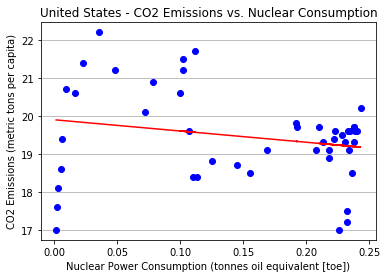

United States Correlation
[[ 1.         -0.21416951]
 [-0.21416951  1.        ]]


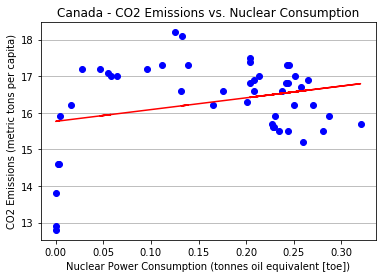

Canada Correlation
[[1.         0.26995542]
 [0.26995542 1.        ]]


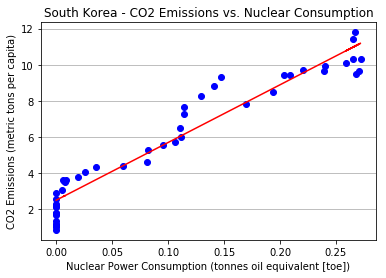

South Korea Correlation
[[1.         0.96271768]
 [0.96271768 1.        ]]


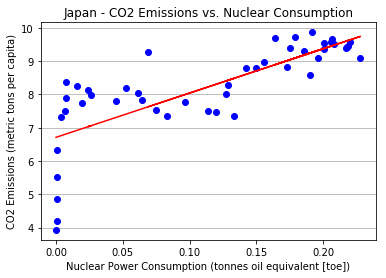

Japan Correlation
[[1.         0.76730079]
 [0.76730079 1.        ]]


In [200]:
countrylist=['United States','Canada', 'South Korea','Japan']

for country in countrylist:
    fig, axis = plt.subplots()
    axis.yaxis.grid(True)
    axis.set_title(country + ' - CO2 Emissions vs. Nuclear Consumption',fontsize=12)
    axis.set_xlabel('Nuclear Power Consumption (tonnes oil equivalent [toe])',fontsize=10)
    axis.set_ylabel('CO2 Emissions (metric tons per capita)',fontsize=10)
    X = nuclear_per_person_df.loc[country]
    Y = co2_emissions_per_person_df.loc[country]
    #axis.scatter(X, Y)
    coef = np.polyfit(X,Y,1)
    poly1d_fn = np.poly1d(coef)
    plt.plot(X,Y, 'bo', X, poly1d_fn(X), 'r')
    plt.show()
    print(country+' Correlation')
    print(np.corrcoef(nuclear_per_person_df.loc[country], co2_emissions_per_person_df.loc[country]));

The USA shows a negative correlation between nuclear power consumption and CO2 generation, but the coefficient of determination is very low (i.e. r-squared close to 0). Canada's scatterplot chart looks similar to the chart for the USA, albeit with a small positive correlation coefficient. In contrast, South Korea shows a strong positive correlation between nuclear consumption and CO2 emissions. However, power demand in South Korea increased by more than 8% per year from 1990 to 2010 and nuclear provides approx. 30% of the electricity supply ( https://www.world-nuclear.org/information-library/country-profiles/countries-o-s/south-korea.aspx ).

***Research Question (3):   *** 
>***What is the statistical relationship between coal consumption, nuclear energy production and co2 emissions?***

***Summary***
>All G20 countries show a positive correlation between coal consumption and CO2 emissions. Emerging market and advanced economies in Asia have very high correlation coefficient above +0.9 . The correlations for European advanced economies are high with coefficients above +0.8. However, the analysis does not show a high coefficient for Japan (+0.6) and the relationsship for the USA is not statistically significant (+0.2). Coal consumption per capita rates are typically high and growing in emerging markets and Asian advanced economies. In addition to power generation, coal is used as an energy source in cement production and China is the largest producer of cement, accounting for close to 60% of global production, followed by India at 7%. European and North American coal consumption had peaked and keeps declining. For example, the United Kingdom was a heavy producer and consumer of coal during its industrialization, but Britsh coal consumption has declined almost completely.      

>Most European advanced economies show a negative correlation between nuclear electicity consumption and CO2 emissions, indicating a partial substitution of carbon fuels by nuclear power. The analysis for other G20 countries does not show strong negative correlation.

<a id='conclusions'></a>
## Conclusions

We have built our report around the analysis of the dependent variable CO2 emissions per capita and the three independent variables national income, coal consumption and nuclear electricity consumption. We have downloaded the time series from Gapminder and have cleaned the data. 

The long-term national income per capita data for G20 countries show a positive trend with accelerating growth after World War 2. The emerging market countries (incl. South Korea) show a very high correlation between CO2 emissions and GDP per capita. Most advanced G20 economies show a flattening of CO2 growth or declining CO2 emissions when income levels exceed USD 20,000. The 1970s mark a major turning point in CO2 emission growth. Advanced nations affected by the two-oil crisis started reducing emissions thereafter while the CO2 growth of emerging economies picked up momentum. Nevertheless, most emerging markets (except China) have not reached the CO2 per capita levels of advanced economies. Our model forecast predicts accelerating growth in mean CO2 emissions from 4.5 tonnes in 2015 to 8.6 tonnes in 2040.

Several G20 countries are heavy users of coal with consumptions above 1 tonne of oil equivalent (toe) per year. The correlations for emerging market economies are very high with coefficients exceeding +0.94. The correlations for European economies are moderate with coefficients above +0.8. However, our analysis does not show a high correlation for Japan and the relationship for the USA is not statistically significant. 

Most European advanced economies with meaningful nuclear power generation above 0.1 toe show a negative correlation between nuclear electricity consumption and CO2 emissions. This indicates a partial substitution of carbon fuels by nuclear power, but nuclear cannot substitute coal in cement production. The negative correlation is strongest for heavy users of nuclear energy, particularly France and Sweden. However, other heavy users of nuclear energy like USA, Canada and until recently Japan do not show meaningful reductions in CO2 emission. In China and India, nuclear power generation does not account for a sizeable contribution to the power mix yet. 

The example of the United Kingdom can demonstrate the relationship between the CO2 emissions (exogenous variable) and income, coal consumption and nuclear electricity consumption over time. Britain was the first country to industrialize, relying mostly on burning coal as an energy source. However, recently Britain phased out most of her coal consumption and significantly reduced CO2 emissions while simultaneously increasing national income. Sizeable nuclear power consumption helped Britain to improvements the CO2 intensity of economic output. 

Alternative energy source like wind and solar where not included in our analysis due to lack of historical data available from Gapminder. Further analysis should also include other fossil fuels like natural gas with significantly lower CO2 emissions.  
 

